<a href="https://colab.research.google.com/github/SevenFeets/credit-card-fraud-detection/blob/main/credit_card_fraud_detection_PRE_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from google.colab import drive
drive.mount('/content/drive')

# Upgrade to the latest stable version of TensorFlow.
%tensorflow_version 2.x

!nvidia-smi

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


Mounted at /content/drive
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
/bin/bash: line 1: nvidia-smi: command not found


In [2]:
import seaborn as sns
#import matplotlib.pyplot
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from   scipy.stats import median_abs_deviation
import tkinter
import pickle
from   itertools import combinations

# Machine learning models and tools
from sklearn.model_selection import train_test_split
import plotly.express as pxt  # Alias for plotly.express
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV


from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
#from sklearn import model_selection

# import plotly.express as pxtest_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing           import            StandardScaler, OneHotEncoder
from sklearn.decomposition           import            PCA
from sklearn.feature_selection       import            SelectKBest, f_classif ,mutual_info_classif
from imblearn.over_sampling          import            SMOTE
from sklearn.linear_model            import            LogisticRegression
from sklearn.ensemble                import            RandomForestClassifier,AdaBoostClassifier
from sklearn.tree                    import            DecisionTreeClassifier
from xgboost                         import            XGBClassifier
from sklearn.naive_bayes             import            GaussianNB
from sklearn.neighbors               import            KNeighborsClassifier
from sklearn.neural_network          import            MLPClassifier
from sklearn.metrics                 import            confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute                  import            KNNImputer
# KFold no shuffling
from sklearn.model_selection         import            KFold

from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
# Others
import warnings
warnings.filterwarnings('ignore')  # To suppress any warnings

In [3]:
# loading data
data = pd.read_csv("/content/drive/MyDrive/application_data - Copy.csv")
df2 = data.copy()
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print('Shape of our Dataset -',data.shape)

Shape of our Dataset - (307511, 122)


In [5]:
# Assuming you already loaded your data into a DataFrame named 'data'
# Count the number of instances in each target class
target_counts = data['TARGET'].value_counts()

# Get the number of fraudulent transactions (target = 1)
fraud_count = target_counts[1]

# Get the total number of transactions
total_count = len(data)

# Calculate the fraud rate as a percentage
fraud_rate = (fraud_count / total_count) * 100

# Print the results
print("Number of fraudulent transactions (target = 1):", fraud_count)
print("Total number of transactions:", total_count)
print("Fraud rate:", f"{fraud_rate:.2f}%")

Number of fraudulent transactions (target = 1): 24825
Total number of transactions: 307511
Fraud rate: 8.07%


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [8]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#### Memory reduce operation

In [9]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('object')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df
data = reduce_mem_usage(data)

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%


In [10]:
data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [11]:

missing_values = data.isnull().sum()
# Calculate percentage of missing values
missing_percentage = (missing_values / len(data)) * 100

missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_info.sort_values(by='Missing Values', ascending=False, inplace=True)

print(missing_info)

                          Missing Values  Percentage
COMMONAREA_MEDI                   214865   69.872297
COMMONAREA_AVG                    214865   69.872297
COMMONAREA_MODE                   214865   69.872297
NONLIVINGAPARTMENTS_MODE          213514   69.432963
NONLIVINGAPARTMENTS_AVG           213514   69.432963
...                                  ...         ...
NAME_HOUSING_TYPE                      0    0.000000
NAME_FAMILY_STATUS                     0    0.000000
NAME_EDUCATION_TYPE                    0    0.000000
NAME_INCOME_TYPE                       0    0.000000
SK_ID_CURR                             0    0.000000

[122 rows x 2 columns]


## **Object type values**

In [12]:
print("Object type values:",np.count_nonzero(data.select_dtypes('object').columns))
print("___________________________________________________________________________________________")
print(data.select_dtypes('object').columns)
print("___________________________________________________________________________________________")



Object type values: 16
___________________________________________________________________________________________
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
___________________________________________________________________________________________


### Label Encoding

In [13]:
le = LabelEncoder()
data['NAME_CONTRACT_TYPE'] = le.fit_transform(data['NAME_CONTRACT_TYPE'])
data['CODE_GENDER'] = le.fit_transform(data['CODE_GENDER'])
data['FLAG_OWN_CAR'] = le.fit_transform(data['FLAG_OWN_CAR'])
data['FLAG_OWN_REALTY'] = le.fit_transform(data['FLAG_OWN_REALTY'])
data['NAME_TYPE_SUITE'] = le.fit_transform(data['NAME_TYPE_SUITE'].astype(str))
data['NAME_INCOME_TYPE'] = le.fit_transform(data['NAME_INCOME_TYPE'])
data['NAME_EDUCATION_TYPE'] = le.fit_transform(data['NAME_EDUCATION_TYPE'])
data['NAME_FAMILY_STATUS'] = le.fit_transform(data['NAME_FAMILY_STATUS'])
data['NAME_HOUSING_TYPE'] = le.fit_transform(data['NAME_HOUSING_TYPE'])
data['OCCUPATION_TYPE'] = le.fit_transform(data['OCCUPATION_TYPE'].astype(str))
data['WEEKDAY_APPR_PROCESS_START'] = le.fit_transform(data['WEEKDAY_APPR_PROCESS_START'])
data['ORGANIZATION_TYPE'] = le.fit_transform(data['ORGANIZATION_TYPE'])
data['FONDKAPREMONT_MODE'] = le.fit_transform(data['FONDKAPREMONT_MODE'].astype(str))
data['HOUSETYPE_MODE'] = le.fit_transform(data['HOUSETYPE_MODE'].astype(str))
data['WALLSMATERIAL_MODE'] = le.fit_transform(data['WALLSMATERIAL_MODE'].astype(str))
data['EMERGENCYSTATE_MODE'] = le.fit_transform(data['EMERGENCYSTATE_MODE'].astype(str))

In [14]:
def colors(value):
    if value > 50 and value < 100:
        color = 'red'
    elif value > 154000 and value < 250000:
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color

def missing(df):
    total = df.isnull().sum().sort_values(ascending = False)
    total = total[total>0]
    percent = df.isnull().sum().sort_values(ascending = False)/len(df)*100
    percent = percent[percent>0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percentage']).style.applymap(colors)
missing(df2.select_dtypes('object'))

,Total,Percentage
FONDKAPREMONT_MODE,210295,68.386172
WALLSMATERIAL_MODE,156341,50.840783
HOUSETYPE_MODE,154297,50.176091
EMERGENCYSTATE_MODE,145755,47.398304
OCCUPATION_TYPE,96391,31.345545
NAME_TYPE_SUITE,1292,0.420148


 ## Missing value Imputation : Mode


In [15]:
def mode_impute(df,col):
    return df[col].fillna(df[col].mode()[0])
df2['FONDKAPREMONT_MODE'] = mode_impute(df2,'FONDKAPREMONT_MODE')
df2['WALLSMATERIAL_MODE'] = mode_impute(df2,'WALLSMATERIAL_MODE')
df2['HOUSETYPE_MODE'] = mode_impute(df2,'HOUSETYPE_MODE')
df2['EMERGENCYSTATE_MODE'] = mode_impute(df2,'EMERGENCYSTATE_MODE')
df2['OCCUPATION_TYPE'] = mode_impute(df2,'OCCUPATION_TYPE')
df2['NAME_TYPE_SUITE'] = mode_impute(df2,'NAME_TYPE_SUITE')
missing(df2.select_dtypes('object'))

,Total,Percentage


In [16]:
# #fill null values with mean,median ,mode
# for i in df1_without_dropping.columns:
#     if df1_without_dropping[i].dtypes == 'object':
#         df1_without_dropping[i].fillna(df1_without_dropping[i].mode()[0], inplace=True)
#     else:
#         df1_without_dropping[i].fillna(df1_without_dropping[i].median(), inplace=True)
# df1_without_dropping

In [17]:
df2.describe(include=['O'])

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,249818,158774,218391,196432,272868,151577,53901,67992,284125,304800,222381,305183


 ## **Integer Type Value**

In [18]:
print("___________________________________________________________________________________________")
print("Int type values:",np.count_nonzero(df2.select_dtypes('int').columns))
print(data.select_dtypes('int').columns)
print("___________________________________________________________________________________________")


___________________________________________________________________________________________
Int type values: 41
Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
___________________________________________________________________________________________


In [19]:
missing(df2.select_dtypes(int))

,Total,Percentage


### Descriptive statistics

In [20]:
def series_mad(x):
    return np.mean(np.abs(x - x.mean()))

# Apply the custom series_mad function along with other aggregations
df2.select_dtypes('int').agg(['count', 'min', 'max', series_mad, 'mean', 'median', 'quantile', 'kurt', 'skew', 'var', 'std'])

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,3.075110e+05,307511.000000,307511.000000,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
min,1.000020e+05,0.000000,0.000000,-2.522900e+04,-1.791200e+04,-7.197000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.562550e+05,1.000000,19.000000,-7.489000e+03,3.652430e+05,0.000000e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
series_mad,8.901023e+04,0.148423,0.584180,3.728372e+03,1.085572e+05,1.316243e+03,0.000007,0.295342,0.319241,0.003726,...,0.000013,0.007025,0.005856,0.002416,0.019659,0.000533,0.016127,0.001189,0.001014,0.000670
mean,2.781805e+05,0.080729,0.417052,-1.603700e+04,6.381505e+04,-2.994202e+03,0.999997,0.819889,0.199368,0.998133,...,0.000007,0.003525,0.002936,0.001210,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
median,2.782020e+05,0.000000,0.000000,-1.575000e+04,-1.213000e+03,-3.254000e+03,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
quantile,2.782020e+05,0.000000,0.000000,-1.575000e+04,-1.213000e+03,-3.254000e+03,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
kurt,-1.198988e+00,7.475109,7.904106,-1.049126e+00,7.716124e-01,-1.106808e+00,307511.000000,0.771852,0.264876,530.743969,...,153752.999974,278.689823,335.552164,821.657064,95.735809,3745.195328,118.014535,1675.415835,1966.256856,2980.592507
skew,-1.200235e-03,3.078159,1.974604,-1.156733e-01,1.664346e+00,3.493275e-01,-554.536744,-1.664886,1.504950,-23.081172,...,392.114779,16.753746,18.372533,28.699333,9.886111,61.214140,10.955080,40.956134,44.364897,54.612939
var,1.056582e+10,0.074212,0.521459,1.904440e+07,1.995884e+10,2.278441e+06,0.000003,0.147671,0.159621,0.001863,...,0.000007,0.003513,0.002928,0.001208,0.009830,0.000267,0.008064,0.000595,0.000507,0.000335


## Integter outlier detection

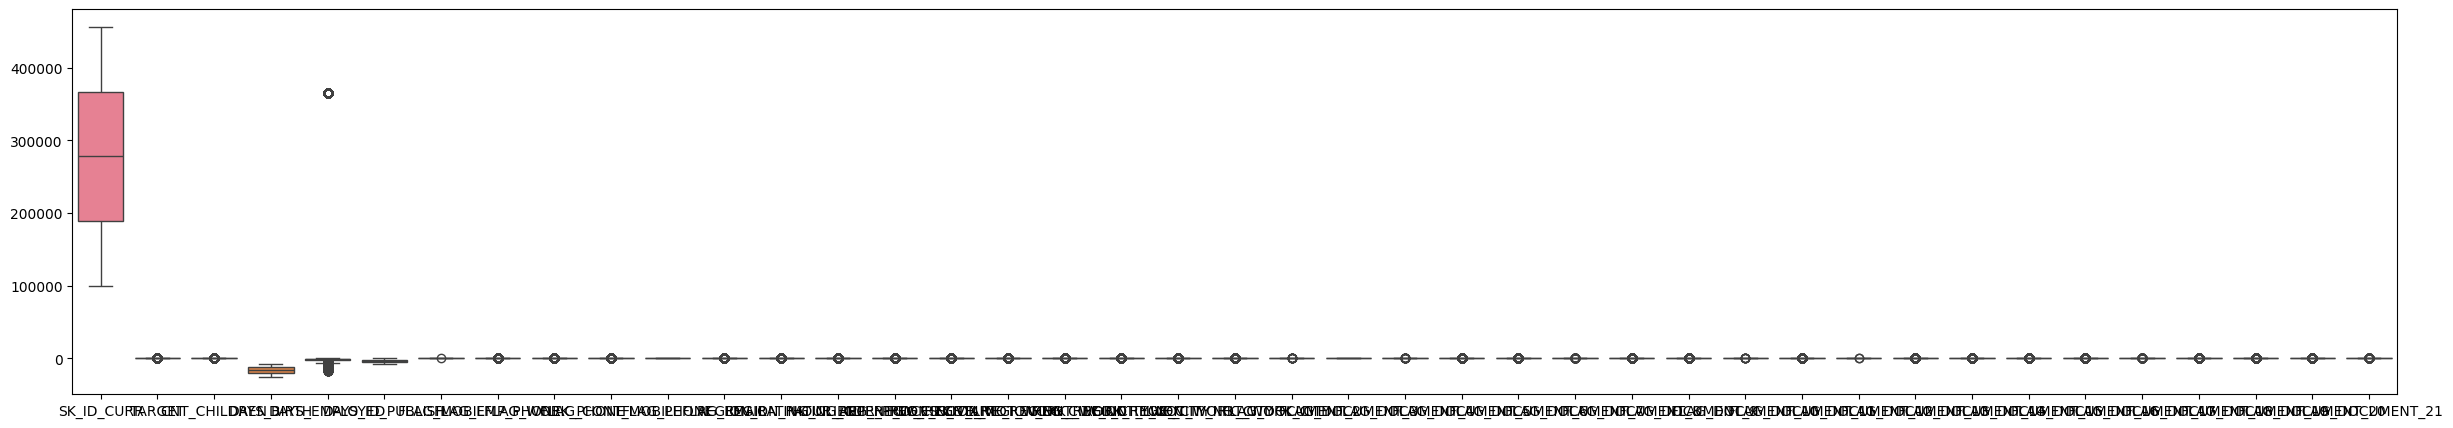

In [21]:
plt.figure(figsize=(30,5))
sns.boxplot(data=df2.select_dtypes('int'))
plt.show()

### Distribution of variables using Histogram


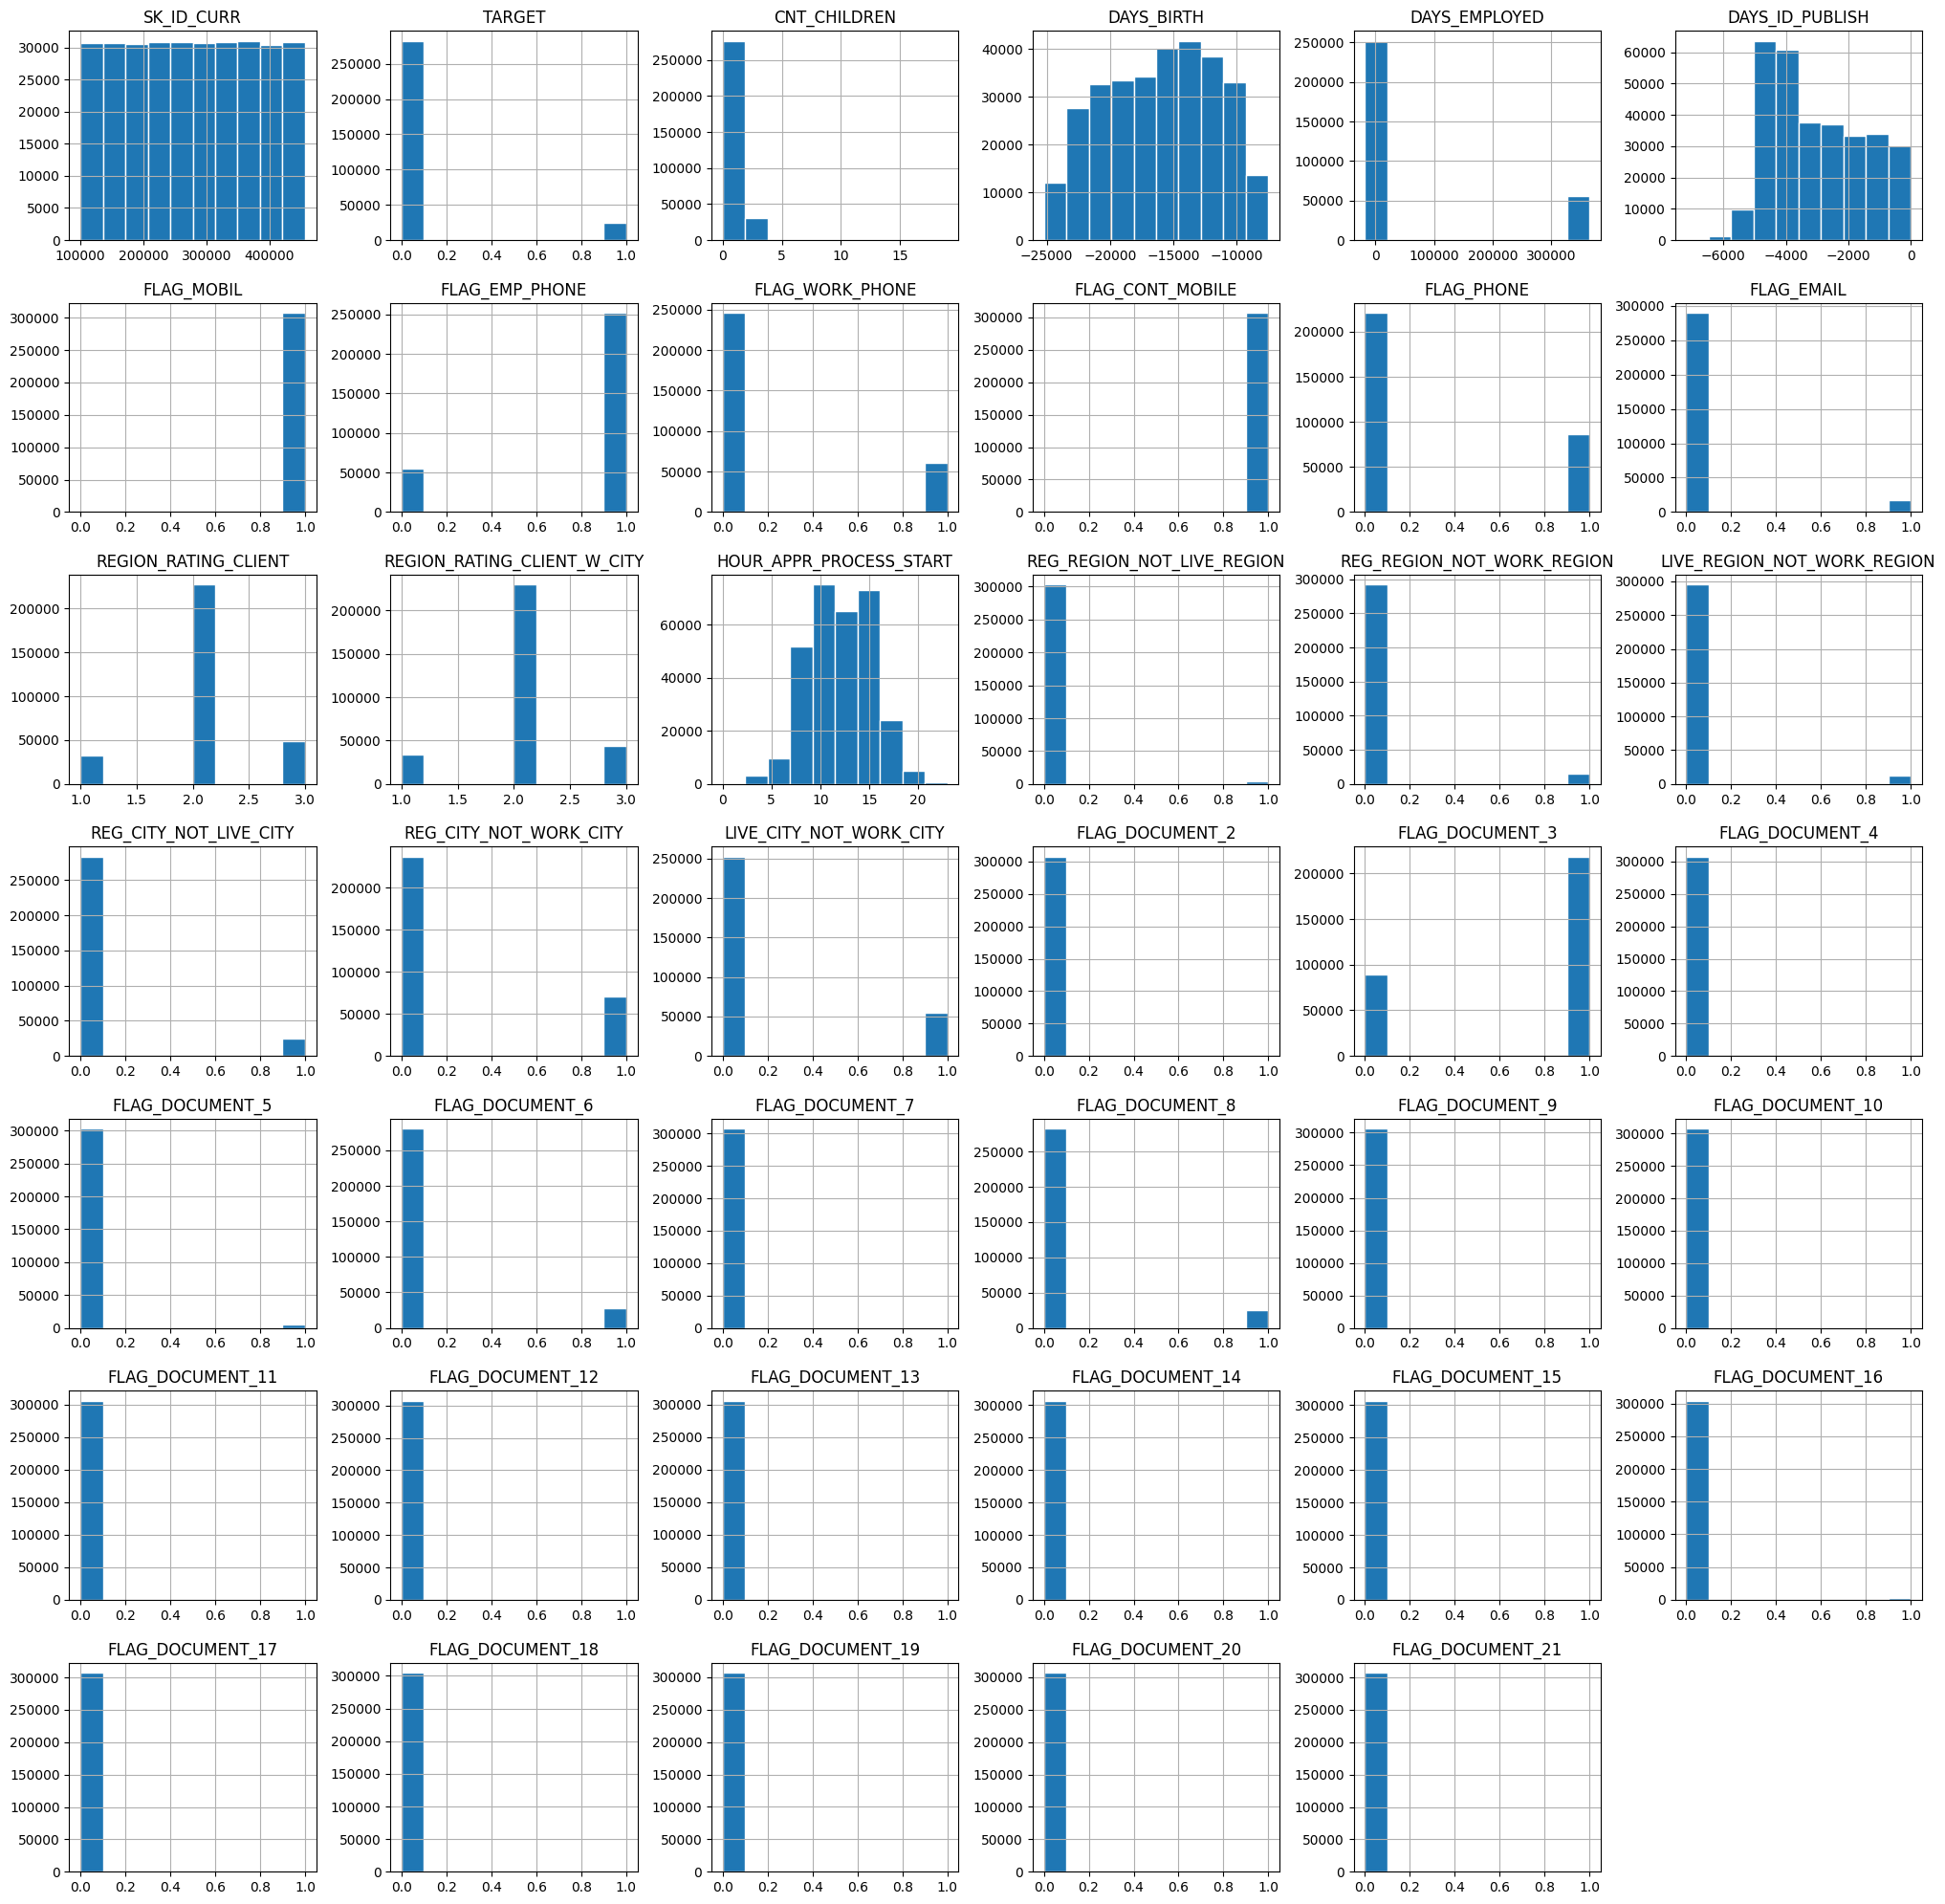

In [22]:
df2.select_dtypes('int').hist(figsize=(25,25), ec='w')
plt.show()

### Relation Between Variables

*Checking correlations between features*

In [23]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color
df2.select_dtypes('int').corr().style.applymap(color_)

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001500,0.001366,-0.000384,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.001075,-0.001138,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.000700,-0.003411,-0.004139,-0.001097,0.002121,-0.002694,0.001809,0.001505,-0.000815,-0.002012,-0.001045,0.000896,-0.001077,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282
TARGET,-0.002108,1.000000,0.019187,0.078239,-0.044932,0.051457,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.058899,0.060893,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,0.005417,0.044346,-0.002672,-0.000316,-0.028602,-0.001520,-0.008040,-0.004352,-0.001414,-0.004229,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.330938,-0.239818,-0.028019,0.001041,0.240714,0.055630,-0.000794,-0.029906,0.022619,0.025423,0.024781,-0.007292,-0.013319,0.008185,0.014835,0.020072,0.070650,0.069957,0.001786,0.056837,-0.003709,-0.016737,-0.157024,-0.001498,0.051697,-0.001997,-0.002756,-0.005318,0.000293,0.003945,-0.005459,0.003609,0.010662,0.000773,0.004031,0.000864,0.000988,-0.002450
DAYS_BIRTH,-0.001500,0.078239,0.330938,1.000000,-0.615864,0.272691,-0.003084,0.619888,0.172457,-0.014985,-0.042402,0.088208,0.009361,0.008073,0.091064,0.065486,0.095819,0.069567,0.180382,0.242401,0.158882,-0.001191,0.109666,-0.002789,0.016774,-0.407160,0.001469,0.113243,0.018213,-0.000168,0.044716,0.000236,0.026333,0.030733,0.012953,0.024044,0.007877,0.044498,0.003614,0.009015,0.027282
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.615864,1.000000,-0.272378,0.000818,-0.999755,-0.233972,0.012745,0.015291,-0.062112,0.032750,0.034624,-0.091138,-0.035803,-0.107150,-0.095539,-0.090516,-0.254559,-0.218101,-0.003090,-0.249082,0.000437,-0.020041,0.597484,-0.002221,-0.121571,-0.023834,-0.000439,-0.028915,-0.001225,-0.025778,-0.023383,-0.014285,-0.042905,-0.007187,-0.040396,-0.010040,-0.010135,-0.008396
DAYS_ID_PUBLISH,-0.000384,0.051457,-0.028019,0.272691,-0.272378,1.000000,-0.002293,0.273611,0.045964,-0.000802,-0.037660,0.027505,-0.005103,-0.007737,0.031676,0.034757,0.048071,0.033938,0.076326,0.099354,0.061094,-0.000349,0.050309,0.000545,0.002066,-0.178282,-0.000034,0.024065,0.015271,-0.001214,0.022875,-0.002193,0.003048,0.008710,0.000158,0.002782,0.004804,0.014084,0.000903,0.000070,0.017246
FLAG_MOBIL,0.002804,0.000534,0.001041,-0.003084,0.000818,-0.002293,1.000000,-0.000845,0.000900,-0.000078,0.001128,0.000442,0.000186,0.000113,-0.000517,0.000224,0.000417,0.000371,0.000525,0.000987,0.000844,0.000012,0.002822,0.000016,0.000223,0.000560,0.000025,-0.006059,0.000113,0.000009,0.000113,0.000005,0.000107,0.000098,0.000063,0.000181,0.000029,-0.019919,0.000044,0.000041,0.000033
FLAG_EMP_PHONE,-0.001337,0.045982,0.240714,0.619888,-0.999755,0.273611,-0.000845,1.000000,0.233801,-0.012819,-0.016131,0.062542,-0.032871,-0.034712,0.091356,0.036640,0.108355,0.096447,0.092166,0.256427,0.219219,0.003047,0.248534,-0.000467,0.019778,-0.597732,0.001605,0.122043,0.023878,0.000463,0.029373,0.001195,0.025878,0.023559,0.014364,0.043008,0.007136,0.040548,0.010049,0.010183,0.008579
FLAG_WORK_PHONE,-0.000415,0.028524,0.055630,0.172457,-0.233972,0.045964,0.000900,0.233801,1.000000,0.021580,0.29

### Covariance

*provides the measure of strength of correlation between two variable or more set of variables.*

In [24]:
df2.select_dtypes('int').cov().style.applymap(color_)

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,10565820148.159863,-59.041266,-83.819815,-672773.474806,19840118.340063,-59637.043657,0.519822,-52.792950,-17.026415,12.488786,127.210825,6.675923,-56.230029,-58.787004,117.591486,-3.550655,24.765159,58.934592,-52.006771,-68.495018,2.649812,0.467797,-159.105827,-3.835537,-13.758077,61.789431,-3.835484,50.845908,9.635097,-0.399524,-12.911967,-0.274046,5.460625,-5.991139,9.303135,-7.376408,2.433360,4.698847,0.419252,2.482850,0.531302
TARGET,-59.041266,0.074212,0.003774,93.013383,-1729.246843,21.159315,0.000000,0.004814,0.003105,0.000004,-0.002915,-0.000111,0.008168,0.008340,-0.021500,0.000186,0.000415,0.000152,0.003247,0.005850,0.003400,0.000010,0.005482,-0.000007,-0.000010,-0.002208,-0.000006,-0.000599,-0.000074,-0.000002,-0.000072,-0.000001,-0.000187,-0.000140,-0.000062,-0.000314,-0.000015,-0.000195,-0.000009,0.000001,0.000018
CNT_CHILDREN,-83.819815,0.003774,0.521459,1042.893640,-24465.822569,-30.541355,0.000001,0.066797,0.016050,-0.000025,-0.009708,0.003778,0.009345,0.008997,-0.017197,-0.001175,0.001297,0.002116,0.003891,0.021485,0.019390,0.000008,0.018624,-0.000024,-0.001475,-0.032132,-0.000015,0.010207,-0.000090,-0.000009,-0.000240,0.000001,0.000169,-0.000213,0.000091,0.000763,0.000009,0.000261,0.000015,0.000016,-0.000032
DAYS_BIRTH,-672773.474806,93.013383,1042.893640,19044396.778354,-379696190.460693,1796274.604283,-0.024269,1039.548207,300.683368,-2.822582,-83.179638,89.039361,20.793917,17.712735,1297.854085,34.901210,91.795168,59.958770,211.315113,445.480226,266.122948,-0.033807,217.158095,-0.109750,8.931602,-503.514317,0.088816,135.118092,4.951212,-0.003499,12.181373,0.002628,6.810740,7.257161,1.964798,10.403174,0.561229,17.437894,0.384622,0.885874,2.178571
DAYS_EMPLOYED,19840118.340063,-1729.246843,-24465.822569,-379696190.460693,19958842205.453899,-58084280.383992,0.208475,-54276.179362,-13206.165065,77.720397,971.080210,-2029.700067,2355.208443,2459.141436,-42049.510410,-617.734580,-3323.126489,-2665.695206,-3432.789043,-15144.888706,-11826.318219,-2.838739,-15967.159919,0.556817,-345.446029,23919.779484,-4.346752,-4695.869363,-209.753185,-0.295962,-255.000541,-0.441518,-215.844983,-178.752631,-70.151202,-600.953661,-16.579148,-512.473665,-34.590424,-32.242815,-21.704477
DAYS_ID_PUBLISH,-59637.043657,21.159315,-30.541355,1796274.604283,-58084280.383992,2278440.567428,-0.006241,158.708853,27.719157,-0.052256,-25.553165,9.603124,-3.921112,-5.871592,156.151994,6.407188,15.928888,10.117304,30.927488,63.156146,35.395021,-0.003422,34.457608,0.007421,0.380569,-76.258727,-0.000712,9.931736,1.435942,-0.008743,2.155424,-0.008441,0.272714,0.711417,0.008264,0.416301,0.118405,1.909037,0.033225,0.002389,0.476338
FLAG_MOBIL,0.519822,0.000000,0.000001,-0.024269,0.208475,-0.006241,0.000003,-0.000001,0.000001,-0.000000,0.000001,0.000000,0.000000,0.000000,-0.000003,0.000000,0.000000,0.000000,0.000000,0.000001,0.000001,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,-0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000003,0.000000,0.000000,0.000000
FLAG_EMP_PHONE,-52.792950,0.004814,0.066797,1039.548207,-54276.179362,158.708853,-0.000001,0.147671,0.035895,-0.000213,-0.002786,0.005559,-0.006430,-0.006706,0.114652,0.001720,0.009141,0.007320,0.009508,0.041498,0.032333,0.000008,0.0

## Float type values

In [25]:

print("___________________________________________________________________________________________")
print("float type values:",np.count_nonzero(df2.select_dtypes('float').columns))
print(df2.select_dtypes('float').columns)
print("___________________________________________________________________________________________")

___________________________________________________________________________________________
float type values: 65
Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       '

### Missing floats values detection

In [26]:
missing(df2.select_dtypes('float'))

,Total,Percentage
COMMONAREA_MODE,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
FLOORSMIN_MEDI,208642,67.848630


#### Missing Value Imputation


In [27]:
df2 = df2.select_dtypes('float').interpolate(method ='linear', limit_direction ='forward')
missing(df2.select_dtypes('float'))

,Total,Percentage
OWN_CAR_AGE,2,0.000650


#### dropping

In [28]:
df2 = df2.dropna(axis = 1)
missing(df2)

,Total,Percentage


### Outlier Detection

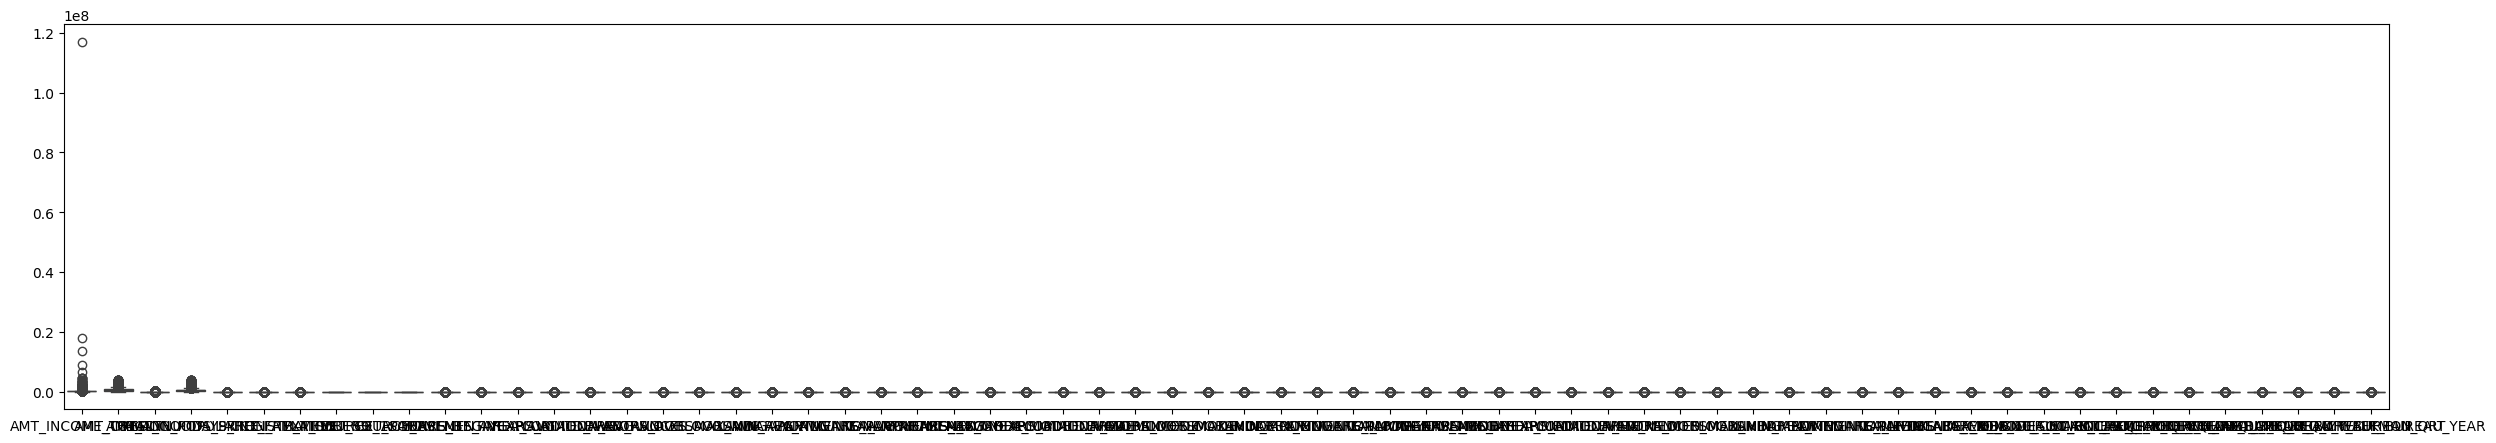

In [29]:
plt.figure(figsize=(30,5))
sns.boxplot(data=df2.select_dtypes('float'))
plt.show()

### Checking Distribution of variables using Histogram


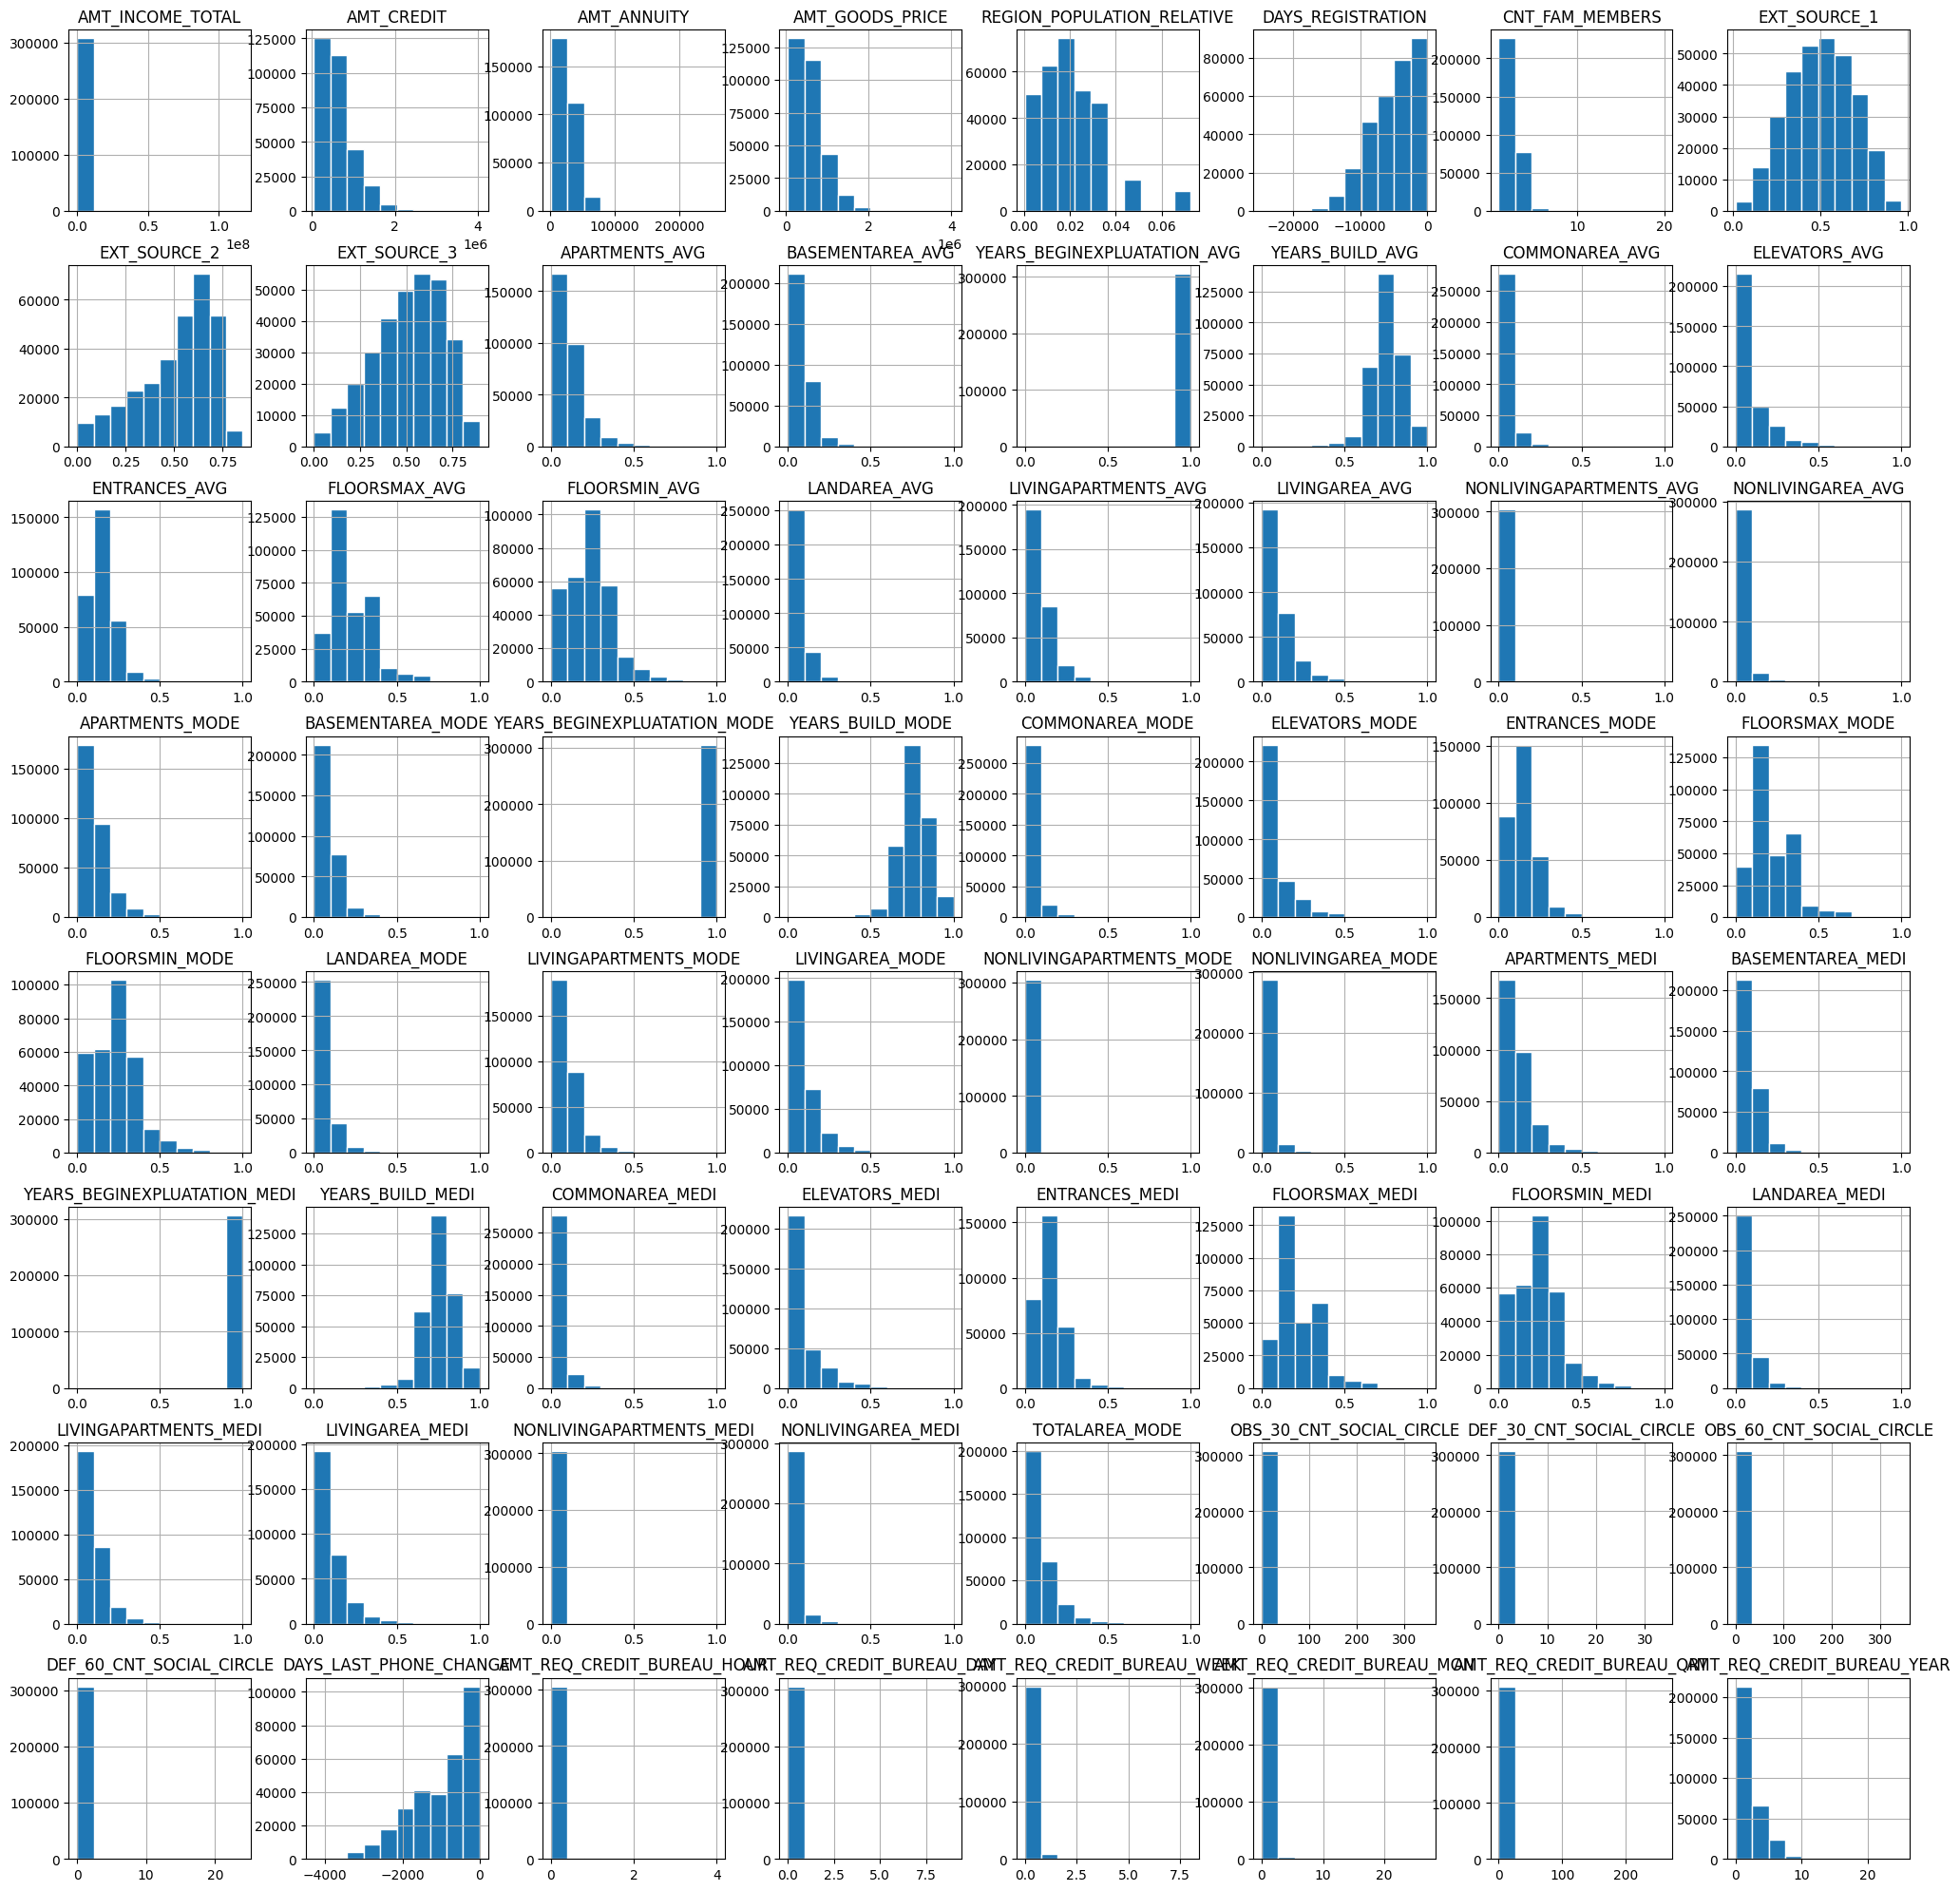

In [30]:
df2.select_dtypes('float').hist(figsize=(25,25), ec='w')
plt.show()

#### Relation Between Variables


In [31]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color
df2.select_dtypes('float').corr().style.applymap(color_)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
AMT_INCOME_TOTAL,1.000000,0.156870,0.191654,0.159579,0.074796,0.027805,0.016341,0.019347,0.060874,-0.027184,0.026665,0.012384,0.004476,0.006547,0.013675,0.033713,0.004892,0.046022,0.024548,-0.000877,0.018643,0.030778,0.005970,0.016631,0.023284,0.009294,0.003999,0.005608,0.011567,0.030772,0.002315,0.044156,0.023197,-0.002158,0.016310,0.027133,0.005178,0.013648,0.026098,0.011743,0.004513,0.006479,0.013440,0.033082,0.004489,0.045598,0.024296,-0.000961,0.018265,0.030268,0.005714,0.015792,0.032820,-0.013009,-0.013255,-0.012934,-0.013128,-0.018585,0.000745,0.002772,0.002254,0.023054,0.005542,0.010656
AMT_CREDIT,0.156870,1.000000,0.770114,0.986443,0.099738,0.009621,0.063160,0.088037,0.131032,0.037622,0.035398,0.018179,0.003291,0.017080,0.017721,0.043632,0.009782,0.061344,0.031846,0.001496,0.023239,0.043444,0.006996,0.019574,0.030756,0.014134,0.002204,0.015947,0.014777,0.039963,0.006118,0.058931,0.030470,-0.000068,0.019529,0.038812,0.006169,0.016376,0.034235,0.017294,0.002982,0.016967,0.017176,0.042639,0.008918,0.060869,0.031650,0.001335,0.022293,0.042657,0.007004,0.018283,0.044558,0.000335,-0.021156,0.000378,-0.023689,-0.073699,-0.002853,0.003615,-0.001612,0.048893,0.014428,-0.045072
AMT_ANNUITY,0.191654,0.770114,1.000000,0.774544,0.118423,0.038526,0.075536,0.062724,0.125636,0.025633,0.043713,0.020242,0.007517,0.014885,0.020002,0.054663,0.008834,0.076872,0.039775,0.003429,0.028784,0.053086,0.008447,0.025756,0.037666,0.014869,0.007161,0.013380,0.016580,0.049661,0.004158,0.074143,0.037594,0.000974,0.024231,0.046900,0.006978,0.021225,0.042236,0.019240,0.007276,0.014678,0.019592,0.053516,0.007890,0.076063,0.039193,0.003185,0.027674,0.052159,0.008157,0.024322,0.054786,-0.011741,-0.022729,-0.011495,-0.023898,-0.063747,0.003756,0.001763,0.011991,0.034713,0.008887,-0.011102
AMT_GOODS_PRICE,0.159579,0.986443,0.774544,1.000000,0.103541,0.011579,0.061135,0.091833,0.139148,0.041117,0.038057,0.020346,0.003926,0.019496,0.017788,0.045271,0.011709,0.064631,0.032682,0.004901,0.024108,0.046549,0.007169,0.021925,0.033373,0.016252,0.002880,0.018329,0.014812,0.041682,0.008112,0.062162,0.031165,0.003217,0.020178,0.041889,0.006238,0.018637,0.036901,0.019436,0.003646,0.019368,0.017232,0.044325,0.010882,0.064147,0.032488,0.004740,0.023132,0.045752,0.007132,0.020629,0.047451,0.000473,-0.022168,0.000482,-0.024430,-0.076241,-0.002264,0.004152,-0.001279,0.050632,0.014922,-0.047425
REGION_POPULATION_RELATIVE,0.074796,0.099738,0.118423,0.103541,1.000000,-0.053820,-0.024208,0.052488,0.198619,-0.004944,0.128705,0.053701,-0.005512,-0.026411,0.068040,0.169867,0.022417,0.206065,0.132545,-0.027712,0.084688,0.134060,0.011430,0.042897,0.109296,0.035500,-0.005562,-0.030020,0.053990,0.152105,0.009012,0.193897,0.123936,-0.032872,0.070763,0.113306,0.008897,0.027864,0.125861,0.051311,-0.005619,-0.027014,

In [32]:
df2.select_dtypes('float').cov().style.applymap(color_)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
AMT_INCOME_TOTAL,56227386501.183777,14971679825.343002,658667380.757526,13976263340.389439,245.308712,23227477.052352,3528.741611,843.548080,2756.342266,-1195.347476,604.493095,210.641602,55.341966,149.440230,209.575214,942.440604,102.218269,1399.353159,799.368248,-14.666170,347.386443,712.533323,56.708696,239.406313,525.766398,161.495970,53.917366,124.431222,173.422732,845.255641,48.784067,1334.033266,754.590723,-36.316510,321.382405,635.235524,47.424844,198.453412,596.024508,199.001841,56.512595,146.294669,206.226069,924.142968,94.087043,1391.035503,793.947861,-16.251670,344.241424,711.671683,53.585485,229.265486,741.366229,-7399.946631,-1402.956806,-7292.482680,-1126.937114,-3643612.308641,14.379705,70.567169,105.706297,4837.641640,993.357648,4567.314188
AMT_CREDIT,14971679825.343002,161998825566.727020,4492476211.574436,146645358280.266663,555.237032,13642359.041591,23150.526516,6515.537285,10070.774076,2807.981460,1362.079400,524.832170,69.076318,661.783404,460.997520,2070.357556,346.905444,3166.030170,1760.244257,42.448698,735.027714,1707.167743,112.808885,478.293551,1178.823602,416.884692,50.442023,600.629124,376.042349,1863.218209,218.838175,3022.047558,1682.398656,-1.944907,653.172249,1542.340396,95.908714,404.169770,1327.120917,497.476332,63.387126,650.265039,447.370769,2021.788506,317.303265,3151.886858,1755.599415,38.326861,713.149126,1702.422295,111.487140,450.554621,1708.418635,323.496663,-3800.836745,361.978276,-3451.649959,-24525685.881555,-93.427583,156.216961,-128.331310,17414.796177,4389.867086,-32789.644854
AMT_ANNUITY,658667380.757526,4492476211.574436,210063031.722209,4146305976.380744,23.739595,1967120.141947,996.991367,167.162385,347.711269,68.892648,60.570152,21.044050,5.681053,20.768701,18.736933,93.400566,11.282360,142.867318,79.167870,3.503295,32.783227,75.117337,4.904687,22.661815,51.986690,15.792940,5.900814,18.146240,15.193336,83.376391,5.355412,136.915276,74.748911,1.002171,29.182937,67.113181,3.906516,18.863622,58.957227,19.928754,5.568802,20.257828,18.375436,91.374183,10.107822,141.830770,78.284592,3.291737,31.878722,74.959199,4.675575,21.582820,75.641949,-408.226714,-147.042770,-396.137548,-125.388355,-763907.220323,4.428060,2.743954,34.372537,445.229105,97.371835,-290.826057
AMT_GOODS_PRICE,13976263340.389439,146645358280.266663,4146305976.380744,136420970802.272598,528.949758,15065987.088660,20563.591335,6236.906289,9814.051101,2816.161086,1343.824622,539.042357,75.615804,693.209734,424.632824,1971.279065,381.068025,3061.053252,1657.692890,127.601559,699.705569,1678.562478,106.080752,491.609660,1173.823168,439.892942,60.482874,633.487289,345.905534,1783.366871,266.258497,2925.280133,1579.108320,84.322845,619.315916,1527.566428,88.987964,422.109868,1312.697322,513.046219,71.101311,681.171710,411.869586,1928.667584,355.

In [33]:
data = data.interpolate(method ='linear', limit_direction ='forward')
data = data.dropna(axis = 1)
missing(data)

,Total,Percentage


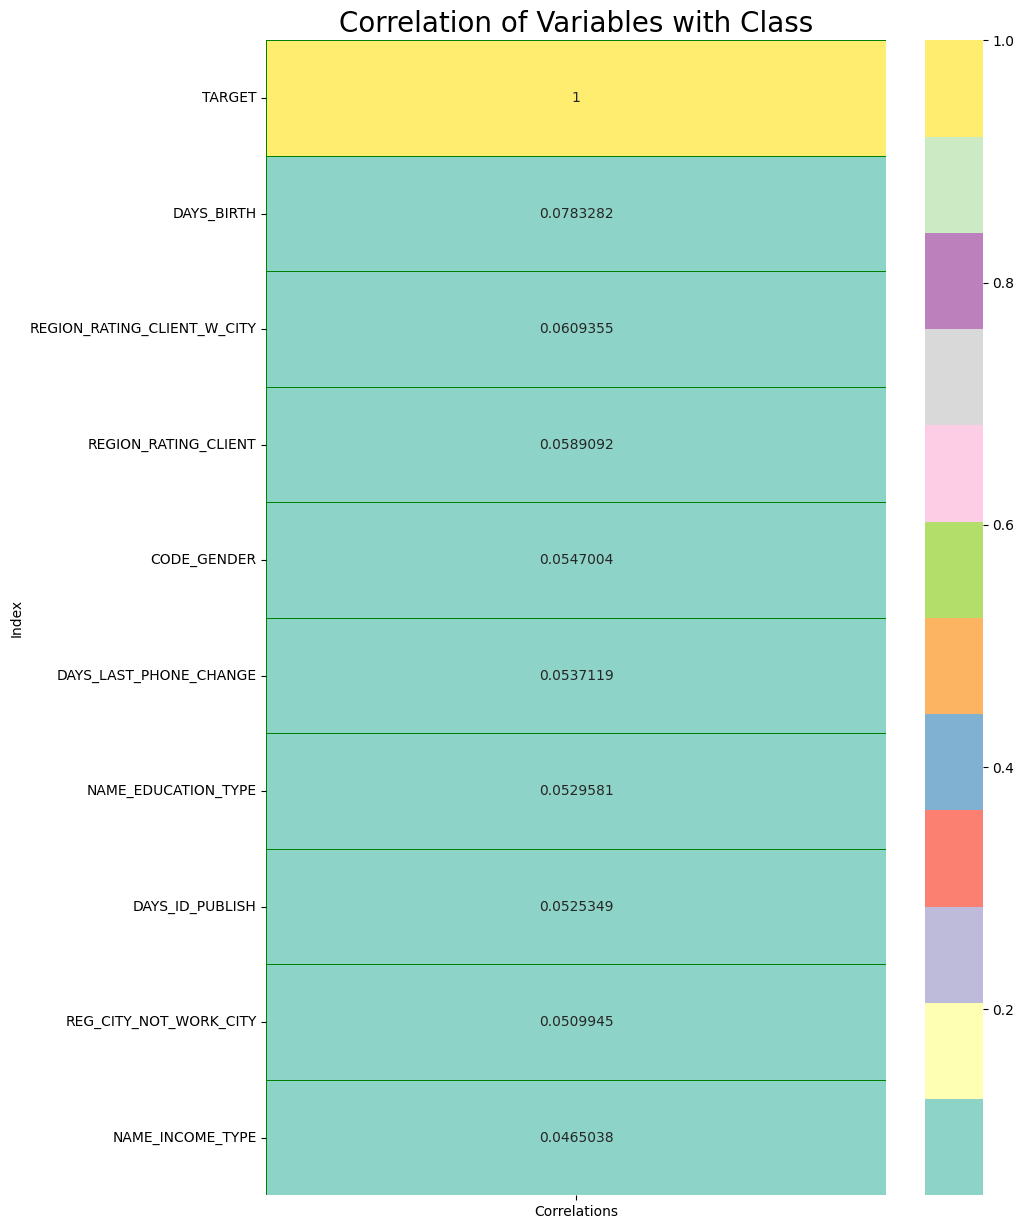

In [34]:
corr = data.corrwith(data['TARGET'],method='spearman').reset_index()

corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False).head(10)

plt.figure(figsize=(10, 15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='Set3', linewidths=0.4, linecolor='green')

plt.title("Correlation of Variables with Class", fontsize=20)
plt.show()

## Data Visualization using seaborn and matplotlib
### We want to:

1. See how the target depends on each feature.
1. Detect the most meaningful features.

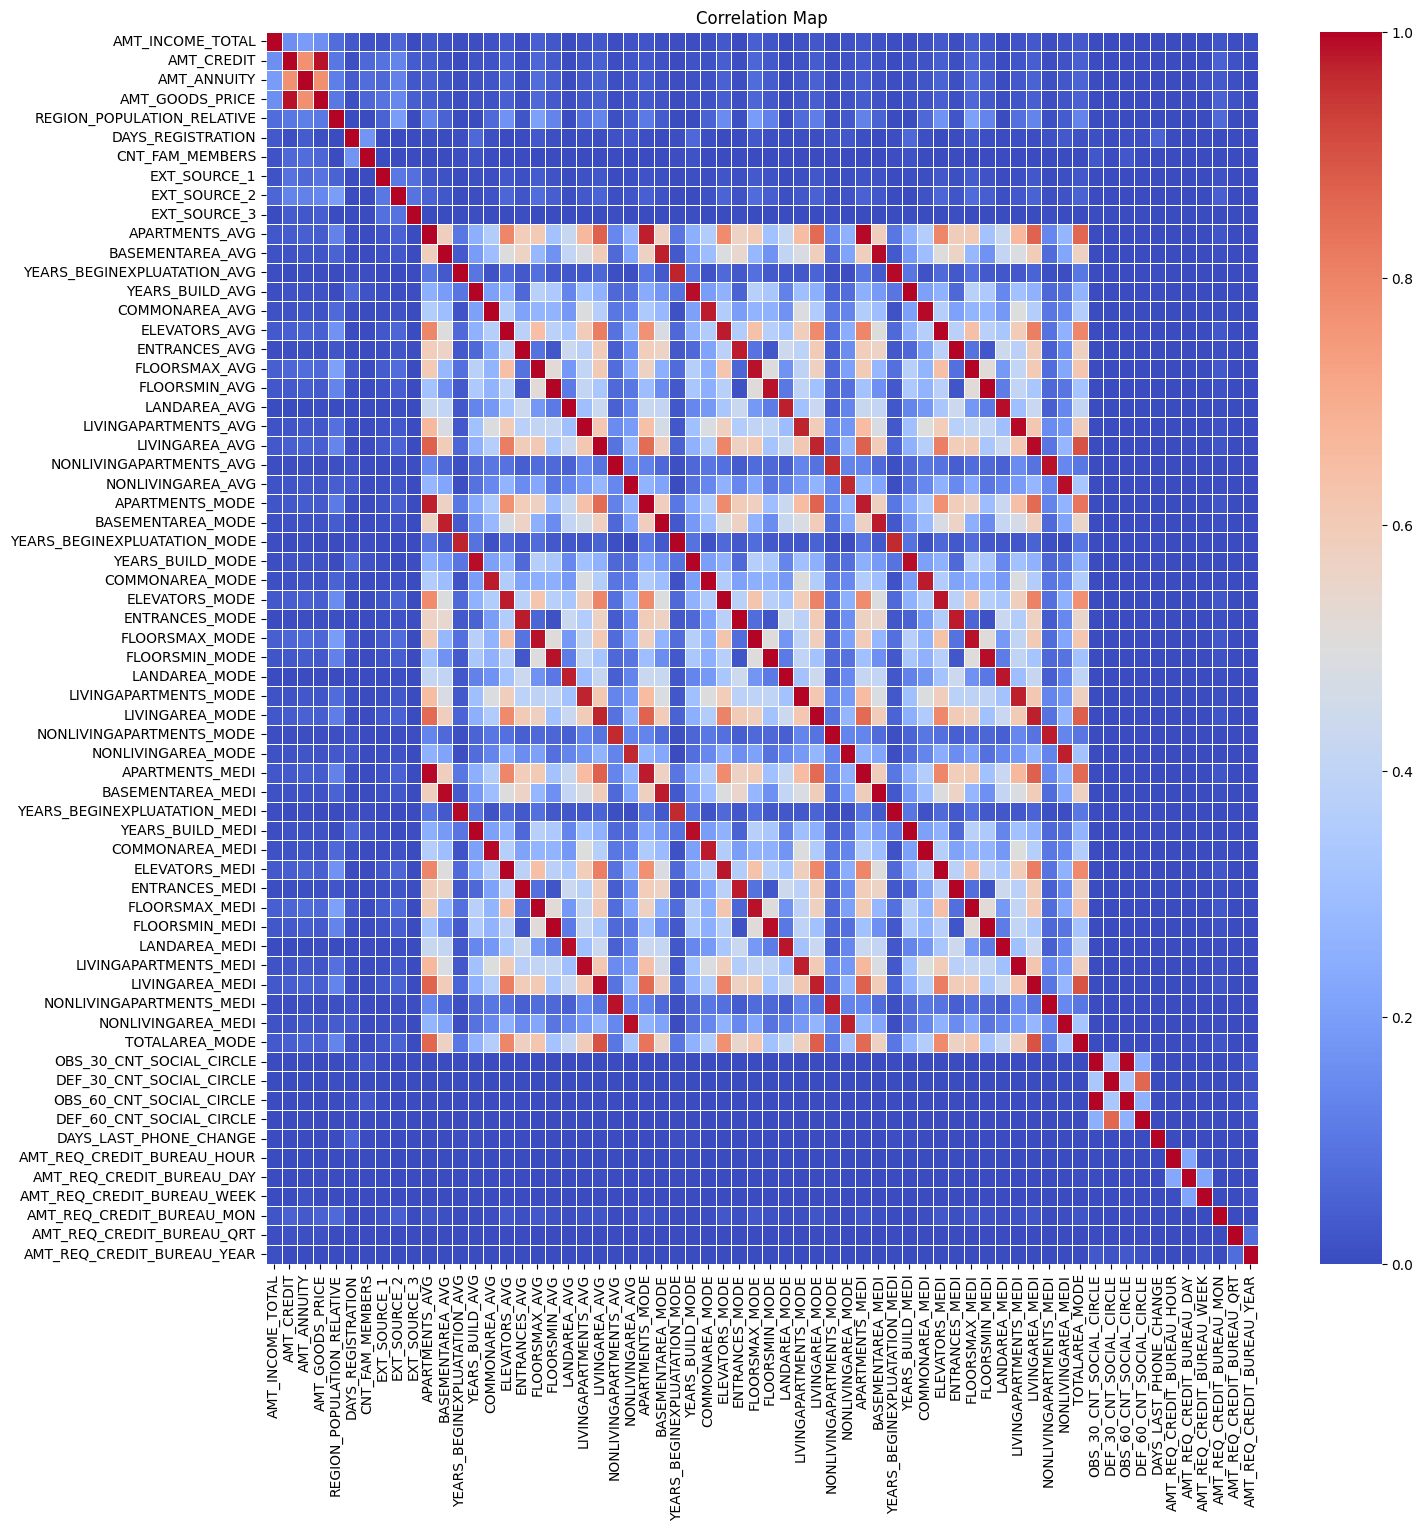

In [35]:
correlation_matrix = df2.corr(numeric_only=True)
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=False, vmin=0, vmax=1, linewidth=0.6, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()


# Bulding classification model


*After EDA I want to build 5 models to try to recreate **Zahra Faraji1 article** *
The models are
1. logistic regression
2. Decision trees
3. Random forest
4. Knn
5. XDG-boost



# Feature Engineering and Preprocessing section

In [36]:
# splitting data for test and train sets
X = data.drop(['TARGET'],axis = 1)
target = data['TARGET']

# # for PCA later
# X_pca = data.drop(['TARGET'],axis = 1)
# target_pca = data['TARGET']

X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size= 0.3, random_state = 0)
print('X_train')
display(X_train)
print()
print('Y_train')
display(Y_train)
print()
print('X_test')
display(X_test)
print()
print('Y_test')
display(Y_test)

X_train


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
125587,245635,0,1,1,0,0,153000.0,104256.0,10440.0,90000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
51500,159635,0,0,0,1,0,427500.0,684000.0,31824.0,684000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
276439,420342,1,0,0,1,0,135000.0,202500.0,10125.0,202500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
244558,383056,0,0,1,1,1,270000.0,1502941.5,45567.0,1372500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
98003,213786,0,0,0,0,0,180000.0,1288350.0,37800.0,1125000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122579,242114,0,0,0,1,1,270000.0,1172470.5,34411.5,918000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0
304137,452374,0,0,0,1,0,180000.0,654498.0,27859.5,585000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
152315,276545,1,1,0,0,1,112500.0,270000.0,13500.0,270000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.5
117952,236776,0,1,1,0,3,202500.0,204858.0,17653.5,171000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0



Y_train


125587    0
51500     0
276439    0
244558    0
98003     0
         ..
122579    0
304137    0
152315    1
117952    1
305711    0
Name: TARGET, Length: 215257, dtype: int8


X_test


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
42962,149741,0,0,0,0,0,117000.0,417024.0,20191.5,360000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.000000
227307,363290,0,1,0,1,0,450000.0,640080.0,31261.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.000000
290035,436006,1,1,1,1,0,450000.0,900000.0,45000.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.000000
239833,377703,0,1,1,0,1,360000.0,1125000.0,33025.5,1125000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.000000
76427,188624,0,1,1,1,0,675000.0,835380.0,42840.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254862,394911,0,0,0,1,0,157500.0,1006920.0,42790.5,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000
127339,247674,0,0,0,1,2,180000.0,521280.0,31630.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.000000
293474,440001,0,1,1,0,0,171000.0,703728.0,21465.0,607500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.000000
10585,112330,0,0,0,0,0,27000.0,225000.0,9531.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.000000



Y_test


42962     1
227307    0
290035    0
239833    0
76427     0
         ..
254862    0
127339    0
293474    0
10585     0
278547    0
Name: TARGET, Length: 92254, dtype: int8

In [37]:
# The function that compares different machine learning algorithms
def ml_model(X_train, X_test, Y_train, Y_test):
    # Updated list of machine learning algorithms, including XGBoost and Random Forest
    MLA = [
        LogisticRegression(),
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),  # Adding Random Forest
        XGBClassifier()  # Adding XGBoost
    ]

    # DataFrame to compare results
    MLA_compare = pd.DataFrame()

    # Loop through each algorithm and evaluate its performance
    for row_index, alg in enumerate(MLA):
        # Fit the model and predict on the test data
        alg.fit(X_train, Y_train)
        predicted = alg.predict(X_test)

        # Collect performance metrics
        MLA_compare.loc[row_index, 'Model Name'] = alg.__class__.__name__
        MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, Y_train), 2)
        MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, Y_test), 2)
        MLA_compare.loc[row_index, 'Precision'] = round(precision_score(Y_test, predicted), 2)
        MLA_compare.loc[row_index, 'Recall'] = round(recall_score(Y_test, predicted), 2)
        MLA_compare.loc[row_index, 'F1 score'] = round(f1_score(Y_test, predicted), 2)

    # Sort by Test Accuracy in descending order
    MLA_compare.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)
    return MLA_compare  # Return the comparison DataFrame

# Get the results by calling the function
print("\n\n")
ml_model(X_train, X_test, Y_train, Y_test)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LogisticRegression,0.92,0.92,0.00,0.00,0.00
3,RandomForestClassifier,1.00,0.92,0.75,0.00,0.00
4,XGBClassifier,0.93,0.92,0.43,0.03,0.06
1,KNeighborsClassifier,0.92,0.91,0.12,0.01,0.02
2,DecisionTreeClassifier,1.00,0.85,0.13,0.15,0.14


# Selecting k best features
* Here we use Kbest select method to find out the K best features. *

* We search for vairus amount of k values to latter compare between and select the best performer *

**steps**
1. We are exploring multiple instances of k  best features with selectKbest
2. We use vif to detect highly multicollinearity  features from 1.
3. We getting visuals via correlation matrix and heatMaps to Detect those features

In [38]:

def select_and_check_features(X_train, target, k_values=[7, 10, 15, 20, 32, 45], ml_model=ml_model):
    for k in k_values:
        best_features = SelectKBest(score_func=mutual_info_classif, k=k)

        # Fitting the best features
        fit = best_features.fit(X_train, target)
        selected_features = best_features.get_support(indices=True)

        # Check multicollinearity using Variance Inflation Factor (VIF)
        from statsmodels.stats.outliers_influence import variance_inflation_factor
        X_train_selected = X_train.iloc[:, selected_features]
        vif = [variance_inflation_factor(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]

        # Print results
        print(f"\nFeatures selected with k = {k}: ")
        print(X_train.columns[selected_features])
        print("\nVariance Inflation factors for selected features: ")
        print(pd.Series(vif, index=X_train.columns[selected_features]).to_string())

        # Model performance evaluation (optional)
        if ml_model is not None:
            # Ensure consistency in dimensions for testing data
            X_test_selected = X_test.iloc[:, selected_features]
            # Evaluate model performance
            ml_model(X_train_selected, X_test_selected, Y_train, Y_test)

# Perform feature selection, VIF check, visualization, and optional model evaluation
select_and_check_features(X_train, Y_train)



Features selected with k = 7: 
Index(['FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_3'],
      dtype='object')

Variance Inflation factors for selected features: 
FLAG_OWN_REALTY        3.411461
NAME_TYPE_SUITE        9.705262
NAME_HOUSING_TYPE      2.986156
FLAG_MOBIL           542.955828
FLAG_EMP_PHONE         5.996085
FLAG_CONT_MOBILE     522.610869
FLAG_DOCUMENT_3        3.697123

Features selected with k = 10: 
Index(['FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_EDUCATION_TYPE',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_3'],
      dtype='object')

Variance Inflation factors for selected features: 
FLAG_OWN_REALTY          3.413306
NAME_TYPE_SUITE          9.719918
NAME_EDUCATION_TYPE      7.297507
NAME_HOUSING_TYPE        2.989478
FLAG_MOBIL             565.174064
FLAG_EMP_PHONE           6.0

## Saving each K into a list (dictionary) to later check performance

In [39]:
import pickle

def select_and_save_features(X_train, target, k_values=[7, 10, 15, 20, 32, 45], output_file='feature_dict.pkl'):
    feature_dict = {}

    for k in k_values:
        best_features = SelectKBest(score_func=mutual_info_classif, k=k)
        fit = best_features.fit(X_train, target)
        selected_features = best_features.get_support(indices=True)
        feature_dict[k] = X_train.columns[selected_features].tolist()

    # Save feature sets to a file
    with open(output_file, 'wb') as f:
        pickle.dump(feature_dict, f)

    return feature_dict

# Use the function to select and save features
feature_dict = select_and_save_features(X_train, Y_train)

# K-folds Cross-Validation

<Axes: xlabel='TARGET', ylabel='Count'>

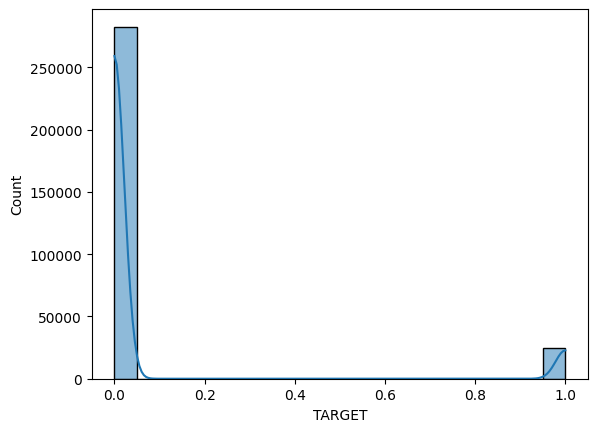

In [40]:
# Review the Target value histogram
sns.histplot(target,kde=True)

**Next code:**

1. Initializes dictionaries to store evaluation metrics for each model across folds.
1. Loops through KFold splits, trains and evaluates each model within each fold.
1. Calculates and stores accuracy, precision, recall, and F1-score for each model in each fold.
1. Calculates average metrics across folds for each model.
1. Creates a pandas DataFrame performance_table with model names and average metrics.

In [41]:
 # Load feature dictionary
 with open('feature_dict.pkl', 'rb') as f:
     feature_dict = pickle.load(f)

def select_low_corr_features(X_train, features, vif_threshold=10, corr_threshold=0.6):
    corr_matrix = X_train[features].corr().abs()
    low_corr_features = []
    for pair in combinations(features, 2):
        if corr_matrix.loc[pair[0], pair[1]] < corr_threshold:
            low_corr_features.extend(pair)
    low_corr_features = list(set(low_corr_features))

    # Check for multicollinearity using VIF
    X_train_selected = X_train[low_corr_features]
    vif_values = [variance_inflation_factor(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]
    vif_series = pd.Series(vif_values, index=low_corr_features)
    low_corr_features = vif_series[vif_series < vif_threshold].index.tolist()

    return low_corr_features

# Create a dictionary to store the low-correlated features for each k
low_corr_feature_dict = {}

# Iterate over each k and select the low-correlated features
for k, features in feature_dict.items():
    low_corr_features = select_low_corr_features(X_train, features)
    low_corr_feature_dict[k] = low_corr_features
    print(f"Low-correlated features for k={k}: {low_corr_features}")
    print("\n")

Low-correlated features for k=7: ['EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_3', 'FLAG_EMP_PHONE', 'NAME_HOUSING_TYPE', 'FLAG_OWN_REALTY']


Low-correlated features for k=10: ['NAME_EDUCATION_TYPE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_3', 'FLAG_EMP_PHONE', 'NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE', 'FLAG_OWN_REALTY']


Low-correlated features for k=15: ['NAME_EDUCATION_TYPE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE', 'NAME_INCOME_TYPE', 'CNT_FAM_MEMBERS', 'FLAG_DOCUMENT_3', 'FLAG_EMP_PHONE', 'NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE', 'FLAG_OWN_REALTY']


Low-correlated features for k=20: ['NAME_EDUCATION_TYPE', 'EMERGENCYSTATE_MODE', 'CNT_FAM_MEMBERS', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE', 'EXT_SOURCE_3', 'NAME_FAMILY_STATUS', 'HOUSETYPE_MODE', 'FLAG_OWN_CAR', 'FLAG_DOCUMENT_3', 'FLAG_EMP_PHONE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'EXT_SOURCE_2']


Low-correlated features for k=32: ['NAME_EDUCATION_TYPE', 'FLAG_PHONE', 'OCCUPATION_TYPE', 'EMERGENCYSTATE_MODE', 'CNT_FAM_MEMBE

## DATA scalling

In [42]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print information after scaling (optional)

print("Mean of features in scaled training data:", X_train_scaled.mean(axis=0))
print('\n')
print("Standard deviation of features in scaled training data: \n", X_train_scaled.std(axis=0))


Mean of features in scaled training data: [-2.72456633e-16  2.52849262e-17  3.76468124e-17 -5.38377475e-17
  7.36101637e-17 -2.22480943e-17  1.28900309e-17  1.01585327e-16
  9.12039831e-17  7.32140552e-17 -7.45839304e-17  1.55142497e-17
 -2.31063294e-17 -4.10632483e-17 -1.02526085e-16 -1.15292332e-16
  6.89228797e-17  1.38637976e-18  1.30715806e-17  4.40340621e-17
  1.65692146e-14  1.23321781e-16  5.22368090e-18  5.66237107e-16
  2.23141124e-17  5.77658235e-19 -1.13121987e-16 -7.81654115e-17
  3.37996086e-16 -1.24559620e-16  8.70118348e-17 -2.89489298e-17
  5.08339247e-18 -1.03400824e-16  3.98749228e-17  2.60771432e-18
  1.28933318e-16 -4.61796498e-17  4.24166190e-17 -2.79124459e-16
 -2.50456106e-16  3.95778414e-17  7.93867461e-18  3.66400366e-17
  8.30375461e-16  2.21094563e-16  4.59485865e-17  4.84737782e-17
  4.47602610e-17 -4.93815269e-17 -8.97763420e-17  8.48332380e-17
 -7.92877189e-17 -7.92217008e-19  1.88151540e-18 -2.17199496e-17
  7.60528328e-17 -6.31628019e-17  7.58217695e-16

# Evaluating models performance



In [43]:
  # Define and evaluate models
  ML_models = [
      ("Logistic Regression", LogisticRegression()),
      ("Decision Tree", DecisionTreeClassifier()),
      ("Random Forest", RandomForestClassifier()),
      ("KNN", KNeighborsClassifier()),
      ("XGBoost", XGBClassifier())
  ]


### Since we did not balanced out data we will expect the accuracy metrics, However the other metrics will be none since the **majority in class are '0'**

In [44]:
 # Load feature dictionary
 with open('feature_dict.pkl', 'rb') as f:
     feature_dict = pickle.load(f)

# Iterate over the dictionary of low-correlated features for each k
for k, feature_names in low_corr_feature_dict.items():
    print(f"Evaluating models with {len(feature_names)} features (k={k})...")

    # Get the column indices of the selected features
    feature_indices = [X_train.columns.get_loc(col) for col in feature_names]

    # Select the relevant features from the training and test data
    X_train_selected = X_train_scaled[:, feature_indices]
    X_test_selected = X_test_scaled[:, feature_indices]

    # Iterate over defined models
    for model_name, model in ML_models:
        print(f"  {model_name}:")

        # Train the model
        model.fit(X_train_selected, Y_train)

        # Make predictions
        y_pred = model.predict(X_test_selected)

        precision = precision_score(Y_test, y_pred, average=None)
        recall = recall_score(Y_test, y_pred, average=None)
        f1 = f1_score(Y_test, y_pred, average=None)

        print(f"Precision (class 0, class 1): {precision}")
        print(f"Recall (class 0, class 1): {recall}")
        print(f"F1-score (class 0, class 1): {f1}")

        # Calculate evaluation metrics
        accuracy = accuracy_score(Y_test, y_pred)
        precision = precision_score(Y_test, y_pred)
        recall = recall_score(Y_test, y_pred)
        f1 = f1_score(Y_test, y_pred)

        # Print the evaluation metrics
        print(f"    Accuracy: {accuracy:.4f}")
        print(f"    Precision: {precision:.4f}")
        print(f"    Recall: {recall:.4f}")
        print(f"    F1-score: {f1:.4f}")
        print("\n")

    print("-" * 30)

Evaluating models with 5 features (k=7)...
  Logistic Regression:
Precision (class 0, class 1): [0.92043705 0.        ]
Recall (class 0, class 1): [1. 0.]
F1-score (class 0, class 1): [0.9585704 0.       ]
    Accuracy: 0.9204
    Precision: 0.0000
    Recall: 0.0000
    F1-score: 0.0000


  Decision Tree:
Precision (class 0, class 1): [0.92043705 0.        ]
Recall (class 0, class 1): [1. 0.]
F1-score (class 0, class 1): [0.9585704 0.       ]
    Accuracy: 0.9204
    Precision: 0.0000
    Recall: 0.0000
    F1-score: 0.0000


  Random Forest:
Precision (class 0, class 1): [0.92043705 0.        ]
Recall (class 0, class 1): [1. 0.]
F1-score (class 0, class 1): [0.9585704 0.       ]
    Accuracy: 0.9204
    Precision: 0.0000
    Recall: 0.0000
    F1-score: 0.0000


  KNN:
Precision (class 0, class 1): [0.9204971  0.12605042]
Recall (class 0, class 1): [0.99877523 0.0020436 ]
F1-score (class 0, class 1): [0.95803986 0.00402199]
    Accuracy: 0.9195
    Precision: 0.1261
    Recall: 0.002

#### This is the reason for previous metrics

In [45]:
Y_train.value_counts()

TARGET
0    197772
1     17485
Name: count, dtype: int64

### Next we will try to evaluate our perfromance

* To better understand how the models are performing on each class, you should compute precision, recall, and F1-score separately for each class by setting average=None in the respective metric functions.

* This will give us the precision, recall, and F1-score for both class 0 (majority) and class 1 (minority) separately. We'll likely see high values for class 0 but very low values for class 1, indicating that the models are struggling to correctly identify the minority class instances.

In [46]:
# Load feature dictionary
with open('feature_dict.pkl', 'rb') as f:
    feature_dict = pickle.load(f)

# Iterate over the dictionary of low-correlated features for each k
for k, feature_names in low_corr_feature_dict.items():
    print(f"Evaluating models with {len(feature_names)} features from k={k}) which where chooses by VIF filtering")

    # Get the column indices of the selected features
    feature_indices = [X_train.columns.get_loc(col) for col in feature_names]

    # Select the relevant features from the training and test data
    X_train_selected = X_train_scaled[:, feature_indices]
    X_test_selected = X_test_scaled[:, feature_indices]

    # Iterate over defined models
    for model_name, model in ML_models:
        print(f" {model_name}:")

        # Train the model
        model.fit(X_train_selected, Y_train)

        # Make predictions
        y_pred = model.predict(X_test_selected)

        # Calculate class-specific metrics
        precision = precision_score(Y_test, y_pred, average=None)
        recall = recall_score(Y_test, y_pred, average=None)
        f1 = f1_score(Y_test, y_pred, average=None)

        print(f"Precision (class 0, class 1): {precision}")
        print(f"Recall (class 0, class 1): {recall}")
        print(f"F1-score (class 0, class 1): {f1}")

        # Calculate overall accuracy
        accuracy = accuracy_score(Y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        print("\n\n")

    print("-" * 30)

Evaluating models with 5 features from k=7) which where chooses by VIF filtering
 Logistic Regression:
Precision (class 0, class 1): [0.92043705 0.        ]
Recall (class 0, class 1): [1. 0.]
F1-score (class 0, class 1): [0.9585704 0.       ]
Accuracy: 0.9204



 Decision Tree:
Precision (class 0, class 1): [0.92043705 0.        ]
Recall (class 0, class 1): [1. 0.]
F1-score (class 0, class 1): [0.9585704 0.       ]
Accuracy: 0.9204



 Random Forest:
Precision (class 0, class 1): [0.92043705 0.        ]
Recall (class 0, class 1): [1. 0.]
F1-score (class 0, class 1): [0.9585704 0.       ]
Accuracy: 0.9204



 KNN:
Precision (class 0, class 1): [0.9204971  0.12605042]
Recall (class 0, class 1): [0.99877523 0.0020436 ]
F1-score (class 0, class 1): [0.95803986 0.00402199]
Accuracy: 0.9195



 XGBoost:
Precision (class 0, class 1): [0.92043705 0.        ]
Recall (class 0, class 1): [1. 0.]
F1-score (class 0, class 1): [0.9585704 0.       ]
Accuracy: 0.9204



------------------------------


### Breakdown

#### * From the output, we can see that for the Logistic Regression, Decision Tree, Random Forest, and XGBoost models, the precision for class 1 (minority class) is 0, the recall for class 1 is 0, and the F1-score for class 1 is 0. This means that these models are not able to correctly identify any instances of the minority class (class 1).

#### * The KNN model seems to be performing slightly better, as it has a non-zero precision, recall, and F1-score for class 1. However, these values are still very low, indicating that the model is struggling to identify the minority class instances accurately.

#### * This behavior is typical when dealing with severely imbalanced datasets, where the minority class is heavily underrepresented compared to the majority class. Most machine learning models, by default, try to optimize their overall accuracy, which can lead them to classify all instances as the majority class, effectively ignoring the minority class.

#### * The root cause of this issue is the class imbalance in your data. Since the minority class (class 1) has only 17,485 instances compared to 197,772 instances of the majority class (class 0), the models are biased towards the majority class to achieve higher overall accuracy.

**To address this problem, you need to apply techniques specifically designed to handle class imbalance, such as:**


##### 1. Oversampling the minority class (e.g., using techniques like SMOTE or ADASYN)
##### 1. Undersampling the majority class (e.g., random undersampling or cluster-based undersampling)
##### 1. Using class weights during model training to give more importance to the minority class
##### 1. Adjusting the classification threshold for the minority class
##### 1. Trying ensemble techniques that are more robust to class imbalance (e.g., bagging, boosting)

## Now we will do the same flow with PCA to see if there any improvements in out results

#### * Later we will do our data balancing

* Creating fresh copy of out original data after EDA

In [47]:
# for PCA
X_PCA = data.drop(['TARGET'],axis = 1)
target_PCA = data['TARGET']


X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA = train_test_split(X_PCA, target_PCA, test_size= 0.3, random_state = 0)

print('X_train_PCA')
display(X_train)
print()
print("\n")
print('X_test_PCA')
display(Y_train)
print()
print("\n")
print('Y_train_PCA')
display(X_test)
print()
print("\n")
print('Y_test_PCA')
display(Y_test)

X_train_PCA


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
125587,245635,0,1,1,0,0,153000.0,104256.0,10440.0,90000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
51500,159635,0,0,0,1,0,427500.0,684000.0,31824.0,684000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
276439,420342,1,0,0,1,0,135000.0,202500.0,10125.0,202500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
244558,383056,0,0,1,1,1,270000.0,1502941.5,45567.0,1372500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
98003,213786,0,0,0,0,0,180000.0,1288350.0,37800.0,1125000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122579,242114,0,0,0,1,1,270000.0,1172470.5,34411.5,918000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0
304137,452374,0,0,0,1,0,180000.0,654498.0,27859.5,585000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
152315,276545,1,1,0,0,1,112500.0,270000.0,13500.0,270000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.5
117952,236776,0,1,1,0,3,202500.0,204858.0,17653.5,171000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0





X_test_PCA


125587    0
51500     0
276439    0
244558    0
98003     0
         ..
122579    0
304137    0
152315    1
117952    1
305711    0
Name: TARGET, Length: 215257, dtype: int8




Y_train_PCA


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
42962,149741,0,0,0,0,0,117000.0,417024.0,20191.5,360000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.000000
227307,363290,0,1,0,1,0,450000.0,640080.0,31261.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.000000
290035,436006,1,1,1,1,0,450000.0,900000.0,45000.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.000000
239833,377703,0,1,1,0,1,360000.0,1125000.0,33025.5,1125000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.000000
76427,188624,0,1,1,1,0,675000.0,835380.0,42840.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254862,394911,0,0,0,1,0,157500.0,1006920.0,42790.5,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000
127339,247674,0,0,0,1,2,180000.0,521280.0,31630.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.000000
293474,440001,0,1,1,0,0,171000.0,703728.0,21465.0,607500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.000000
10585,112330,0,0,0,0,0,27000.0,225000.0,9531.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.000000





Y_test_PCA


42962     1
227307    0
290035    0
239833    0
76427     0
         ..
254862    0
127339    0
293474    0
10585     0
278547    0
Name: TARGET, Length: 92254, dtype: int8

* Performing PCA on all 120 features (originally 122 , but we dropped 2 )

In [48]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_PCA)
X_test_pca = pca.transform(X_test_PCA)

# Print the explained variance ratio for each principal component
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
print("\nCumulative Explained Variance Ratio:")
print(cumulative_variance_ratio)

Explained Variance Ratio:
[7.37365976e-01 1.82676570e-01 4.88131735e-02 2.59591346e-02
 4.91621917e-03 2.04362928e-04 3.65366121e-05 2.13198716e-05
 5.07642401e-06 1.62922455e-06 6.19551153e-10 6.09736593e-11
 2.90254871e-11 2.59443617e-11 1.44141662e-11 1.14252730e-11
 1.13238761e-11 7.91301588e-12 7.69193134e-12 4.22045683e-12
 3.73343870e-12 2.48003142e-12 2.08908836e-12 1.91283786e-12
 1.85067637e-12 1.08299503e-12 8.47366809e-13 8.20353599e-13
 7.39879322e-13 6.85524809e-13 6.24740489e-13 5.65840668e-13
 5.11481597e-13 4.66789021e-13 3.82379373e-13 3.49813172e-13
 2.75212049e-13 2.00498481e-13 1.85151698e-13 1.76783525e-13
 1.58056909e-13 1.41702493e-13 1.31275055e-13 1.27750016e-13
 9.68281102e-14 8.37470239e-14 7.24468045e-14 7.13654967e-14
 6.40084585e-14 5.30928597e-14 5.24934324e-14 5.12665431e-14
 4.33460086e-14 3.58472060e-14 3.29888984e-14 3.04071764e-14
 2.77366477e-14 2.68264692e-14 2.64103674e-14 2.44215293e-14
 2.37284705e-14 2.32847992e-14 2.09685986e-14 2.06953095e-1

### PCA feature selection

In [49]:
print("X_train_pca shape:", X_train_pca.shape)
print("X_train_pca type:", type(X_train_pca))
print("\n")
print("y_train_pca shape:", Y_train_PCA.shape)
print("y_train_pca type:", type(Y_train_PCA))
print("\n")
print("X_test_pca shape:", X_test_pca.shape)
print("X_test_pca type:", type(X_test_pca))
print("\n")
print("y_test_pca shape:", Y_test_PCA.shape)
print("y_test_pca type:", type(Y_test_PCA))

X_train_pca shape: (215257, 120)
X_train_pca type: <class 'numpy.ndarray'>


y_train_pca shape: (215257,)
y_train_pca type: <class 'pandas.core.series.Series'>


X_test_pca shape: (92254, 120)
X_test_pca type: <class 'numpy.ndarray'>


y_test_pca shape: (92254,)
y_test_pca type: <class 'pandas.core.series.Series'>


In [50]:
  # Define and evaluate models
  models = [
      ("Logistic Regression", LogisticRegression()),
      ("Decision Tree", DecisionTreeClassifier()),
      ("Random Forest", RandomForestClassifier()),
      ("KNN", KNeighborsClassifier()),
      ("XGBoost", XGBClassifier())
  ]


In [51]:
# Function to evaluate models
def evaluate_models(X_train, X_test, Y_train, Y_test, models):
    results = []

    for model_name, model in models:
        model.fit(X_train, Y_train)
        predicted = model.predict(X_test)

        accuracy = accuracy_score(Y_test, predicted)
        precision = precision_score(Y_test, predicted)
        recall = recall_score(Y_test, predicted)
        f1 = f1_score(Y_test, predicted)

        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        })

    return pd.DataFrame(results)

# **Evaluating models for feature selection**

**Logistic regression:**

In [53]:
def select_top_PCA_features(X_train_pca, Y_train_PCA, n_components_list=[15, 25, 32, 45, 55], ml_model=None, corr_threshold=0.7, vif_threshold=20):
    for n_components in n_components_list:
        print(f"\n\nEvaluating {n_components} principal components:")

        # Use mutual information to select the top n_components features
        mutual_info = mutual_info_classif(X_train_pca, Y_train_PCA)
        top_features_indices = np.argsort(mutual_info)[-n_components:]

        # Get the names of the selected features
        feature_names = ['PC_' + str(i + 1) for i in top_features_indices]
        print(f"Top {n_components} features selected: {', '.join(feature_names)}")

        # Select the top features from the training data
        X_train_selected_pca = X_train_pca[:, top_features_indices]

        # Check correlation with target variable
        corr_with_target = [np.corrcoef(X_train_selected_pca[:, i], Y_train_PCA)[0, 1] for i in range(n_components)]
        print(f"Correlation with target: {corr_with_target}")

        # Check multicollinearity using Variance Inflation Factor (VIF)
        vif = [variance_inflation_factor(X_train_selected_pca, i) for i in range(X_train_selected_pca.shape[1])]
        print(f"Variance Inflation Factors: {vif}")

        # Remove highly correlated features
        low_corr_indices = [i for i, corr in enumerate(np.abs(corr_with_target)) if corr < corr_threshold]
        X_train_selected_pca = X_train_selected_pca[:, low_corr_indices]
        vif = [vif[i] for i in low_corr_indices]

        # Remove features with high VIF
        low_vif_indices = [i for i, vif_value in enumerate(vif) if vif_value < vif_threshold]
        X_train_selected_pca = X_train_selected_pca[:, low_vif_indices]
        X_test_selected_pca = X_test_pca[:, top_features_indices][:, low_vif_indices]

        print(f"Remaining features after correlation and VIF filtering: {X_train_selected_pca.shape[1]}")

        # Model performance evaluation (optional)
        if ml_model is not None:
            ml_model.fit(X_train_selected_pca, Y_train_PCA)
            y_pred = ml_model.predict(X_test_selected_pca)
            accuracy = accuracy_score(Y_test_PCA, y_pred)
            print(f"Model accuracy with {X_train_selected_pca.shape[1]} features: {accuracy:.4f}")


# Call the select_top_PCA_features function for a specific model
model_name = "Logistic Regression"
model = LogisticRegression()
print(f"\nEvaluating {model_name}")
select_top_PCA_features(X_train_pca, Y_train_PCA, n_components_list=[15, 25, 32, 45, 55], ml_model=model, corr_threshold=0.7, vif_threshold=20)

# # Call the function to evaluate models
# model_results = evaluate_models(X_train_pca, X_test_pca, Y_train_PCA, Y_test_PCA, models)
# print(model_results)


Evaluating Logistic Regression


Evaluating 15 principal components:
Top 15 features selected: PC_26, PC_22, PC_76, PC_11, PC_36, PC_48, PC_38, PC_77, PC_3, PC_5, PC_12, PC_1, PC_85, PC_45, PC_46
Correlation with target: [0.0457838603993478, -0.0038540111975829583, 0.005826211066419774, -0.004782212736296742, 0.05671713806488289, 0.042437900200713696, -0.010104630918852128, -0.002393073191824483, -0.04823971299728532, -0.05389064202959914, -0.0043734422831939465, -0.03584034777826145, 0.0010565334618009333, 0.016488996651929256, -0.1637504020720101]
Variance Inflation Factors: [1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 0.9999999999999998, 1.0, 1.0, 1.0, 0.9999999999999998, 0.9999999999999998, 1.0, 1.0, 1.0, 1.0]
Remaining features after correlation and VIF filtering: 15
Model accuracy with 15 features: 0.4487


Evaluating 25 principal components:
Top 25 features selected: PC_39, PC_83, PC_61, PC_15, PC_58, PC_105, PC_13, PC_119, PC_7, PC_23, PC_26, PC_22, PC_76, PC_11, PC_36, PC_48, PC_

**Decision Trees**

In [54]:
def select_top_PCA_features(X_train_pca, Y_train_PCA, n_components_list=[15, 25, 32, 45, 55], ml_model=None, corr_threshold=0.7, vif_threshold=20):
    for n_components in n_components_list:
        print(f"\n\nEvaluating {n_components} principal components:")

        # Use mutual information to select the top n_components features
        mutual_info = mutual_info_classif(X_train_pca, Y_train_PCA)
        top_features_indices = np.argsort(mutual_info)[-n_components:]

        # Get the names of the selected features
        feature_names = ['PC_' + str(i + 1) for i in top_features_indices]
        print(f"Top {n_components} features selected: {', '.join(feature_names)}")

        # Select the top features from the training data
        X_train_selected_pca = X_train_pca[:, top_features_indices]

        # Check correlation with target variable
        corr_with_target = [np.corrcoef(X_train_selected_pca[:, i], Y_train_PCA)[0, 1] for i in range(n_components)]
        print(f"Correlation with target: {corr_with_target}")

        # Check multicollinearity using Variance Inflation Factor (VIF)
        vif = [variance_inflation_factor(X_train_selected_pca, i) for i in range(X_train_selected_pca.shape[1])]
        print(f"Variance Inflation Factors: {vif}")

        # Remove highly correlated features
        low_corr_indices = [i for i, corr in enumerate(np.abs(corr_with_target)) if corr < corr_threshold]
        X_train_selected_pca = X_train_selected_pca[:, low_corr_indices]
        vif = [vif[i] for i in low_corr_indices]

        # Remove features with high VIF
        low_vif_indices = [i for i, vif_value in enumerate(vif) if vif_value < vif_threshold]
        X_train_selected_pca = X_train_selected_pca[:, low_vif_indices]
        X_test_selected_pca = X_test_pca[:, top_features_indices][:, low_vif_indices]

        print(f"Remaining features after correlation and VIF filtering: {X_train_selected_pca.shape[1]}")

        # Model performance evaluation (optional)
        if ml_model is not None:
            ml_model.fit(X_train_selected_pca, Y_train_PCA)
            y_pred = ml_model.predict(X_test_selected_pca)
            accuracy = accuracy_score(Y_test_PCA, y_pred)
            print(f"Model accuracy with {X_train_selected_pca.shape[1]} features: {accuracy:.4f}")


# Call the select_top_PCA_features function for a specific model
model_name = "Decision Trees"
model = DecisionTreeClassifier()
print(f"\nEvaluating {model_name}")
select_top_PCA_features(X_train_pca, Y_train_PCA, n_components_list=[15, 25, 32, 45, 55], ml_model=model, corr_threshold=0.7, vif_threshold=20)




Evaluating Decision Trees


Evaluating 15 principal components:
Top 15 features selected: PC_26, PC_22, PC_76, PC_11, PC_36, PC_48, PC_38, PC_77, PC_3, PC_5, PC_12, PC_1, PC_85, PC_45, PC_46
Correlation with target: [0.0457838603993478, -0.0038540111975829583, 0.005826211066419774, -0.004782212736296742, 0.05671713806488289, 0.042437900200713696, -0.010104630918852128, -0.002393073191824483, -0.04823971299728532, -0.05389064202959914, -0.0043734422831939465, -0.03584034777826145, 0.0010565334618009333, 0.016488996651929256, -0.1637504020720101]
Variance Inflation Factors: [1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 0.9999999999999998, 1.0, 1.0, 1.0, 0.9999999999999998, 0.9999999999999998, 1.0, 1.0, 1.0, 1.0]
Remaining features after correlation and VIF filtering: 15
Model accuracy with 15 features: 0.8509


Evaluating 25 principal components:
Top 25 features selected: PC_39, PC_83, PC_61, PC_15, PC_58, PC_105, PC_13, PC_119, PC_7, PC_23, PC_26, PC_22, PC_76, PC_11, PC_36, PC_48, PC_38, P

**Random Forest**

In [55]:
def select_top_PCA_features(X_train_pca, Y_train_PCA, n_components_list=[15, 25, 32, 45, 55], ml_model=None, corr_threshold=0.7, vif_threshold=20):
    for n_components in n_components_list:
        print(f"\n\nEvaluating {n_components} principal components:")

        # Use mutual information to select the top n_components features
        mutual_info = mutual_info_classif(X_train_pca, Y_train_PCA)
        top_features_indices = np.argsort(mutual_info)[-n_components:]

        # Get the names of the selected features
        feature_names = ['PC_' + str(i + 1) for i in top_features_indices]
        print(f"Top {n_components} features selected: {', '.join(feature_names)}")

        # Select the top features from the training data
        X_train_selected_pca = X_train_pca[:, top_features_indices]

        # Check correlation with target variable
        corr_with_target = [np.corrcoef(X_train_selected_pca[:, i], Y_train_PCA)[0, 1] for i in range(n_components)]
        print(f"Correlation with target: {corr_with_target}")

        # Check multicollinearity using Variance Inflation Factor (VIF)
        vif = [variance_inflation_factor(X_train_selected_pca, i) for i in range(X_train_selected_pca.shape[1])]
        print(f"Variance Inflation Factors: {vif}")

        # Remove highly correlated features
        low_corr_indices = [i for i, corr in enumerate(np.abs(corr_with_target)) if corr < corr_threshold]
        X_train_selected_pca = X_train_selected_pca[:, low_corr_indices]
        vif = [vif[i] for i in low_corr_indices]

        # Remove features with high VIF
        low_vif_indices = [i for i, vif_value in enumerate(vif) if vif_value < vif_threshold]
        X_train_selected_pca = X_train_selected_pca[:, low_vif_indices]
        X_test_selected_pca = X_test_pca[:, top_features_indices][:, low_vif_indices]

        print(f"Remaining features after correlation and VIF filtering: {X_train_selected_pca.shape[1]}")

        # Model performance evaluation (optional)
        if ml_model is not None:
            ml_model.fit(X_train_selected_pca, Y_train_PCA)
            y_pred = ml_model.predict(X_test_selected_pca)
            accuracy = accuracy_score(Y_test_PCA, y_pred)
            print(f"Model accuracy with {X_train_selected_pca.shape[1]} features: {accuracy:.4f}")


# Call the select_top_PCA_features function for a specific model
model_name = "Random Forest"
model = RandomForestClassifier()
print(f"\nEvaluating {model_name}")
select_top_PCA_features(X_train_pca, Y_train_PCA, n_components_list=[15, 25, 32, 45, 55], ml_model=model, corr_threshold=0.7, vif_threshold=20)




Evaluating Random Forest


Evaluating 15 principal components:
Top 15 features selected: PC_26, PC_22, PC_76, PC_11, PC_36, PC_48, PC_38, PC_77, PC_3, PC_5, PC_12, PC_1, PC_85, PC_45, PC_46
Correlation with target: [0.0457838603993478, -0.0038540111975829583, 0.005826211066419774, -0.004782212736296742, 0.05671713806488289, 0.042437900200713696, -0.010104630918852128, -0.002393073191824483, -0.04823971299728532, -0.05389064202959914, -0.0043734422831939465, -0.03584034777826145, 0.0010565334618009333, 0.016488996651929256, -0.1637504020720101]
Variance Inflation Factors: [1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 0.9999999999999998, 1.0, 1.0, 1.0, 0.9999999999999998, 0.9999999999999998, 1.0, 1.0, 1.0, 1.0]
Remaining features after correlation and VIF filtering: 15
Model accuracy with 15 features: 0.9204


Evaluating 25 principal components:
Top 25 features selected: PC_39, PC_83, PC_61, PC_15, PC_58, PC_105, PC_13, PC_119, PC_7, PC_23, PC_26, PC_22, PC_76, PC_11, PC_36, PC_48, PC_38, PC

**KNN**

In [56]:
def select_top_PCA_features(X_train_pca, Y_train_PCA, n_components_list=[15, 25, 32, 45, 55], ml_model=None, corr_threshold=0.7, vif_threshold=20):
    for n_components in n_components_list:
        print(f"\n\nEvaluating {n_components} principal components:")

        # Use mutual information to select the top n_components features
        mutual_info = mutual_info_classif(X_train_pca, Y_train_PCA)
        top_features_indices = np.argsort(mutual_info)[-n_components:]

        # Get the names of the selected features
        feature_names = ['PC_' + str(i + 1) for i in top_features_indices]
        print(f"Top {n_components} features selected: {', '.join(feature_names)}")

        # Select the top features from the training data
        X_train_selected_pca = X_train_pca[:, top_features_indices]

        # Check correlation with target variable
        corr_with_target = [np.corrcoef(X_train_selected_pca[:, i], Y_train_PCA)[0, 1] for i in range(n_components)]
        print(f"Correlation with target: {corr_with_target}")

        # Check multicollinearity using Variance Inflation Factor (VIF)
        vif = [variance_inflation_factor(X_train_selected_pca, i) for i in range(X_train_selected_pca.shape[1])]
        print(f"Variance Inflation Factors: {vif}")

        # Remove highly correlated features
        low_corr_indices = [i for i, corr in enumerate(np.abs(corr_with_target)) if corr < corr_threshold]
        X_train_selected_pca = X_train_selected_pca[:, low_corr_indices]
        vif = [vif[i] for i in low_corr_indices]

        # Remove features with high VIF
        low_vif_indices = [i for i, vif_value in enumerate(vif) if vif_value < vif_threshold]
        X_train_selected_pca = X_train_selected_pca[:, low_vif_indices]
        X_test_selected_pca = X_test_pca[:, top_features_indices][:, low_vif_indices]

        print(f"Remaining features after correlation and VIF filtering: {X_train_selected_pca.shape[1]}")

        # Model performance evaluation (optional)
        if ml_model is not None:
            ml_model.fit(X_train_selected_pca, Y_train_PCA)
            y_pred = ml_model.predict(X_test_selected_pca)
            accuracy = accuracy_score(Y_test_PCA, y_pred)
            print(f"Model accuracy with {X_train_selected_pca.shape[1]} features: {accuracy:.4f}")


# Call the select_top_PCA_features function for a specific model
model_name = "KNN"
model = KNeighborsClassifier()
print(f"\nEvaluating {model_name}")
select_top_PCA_features(X_train_pca, Y_train_PCA, n_components_list=[15, 25, 32, 45, 55], ml_model=model, corr_threshold=0.7, vif_threshold=20)



Evaluating KNN


Evaluating 15 principal components:
Top 15 features selected: PC_26, PC_22, PC_76, PC_11, PC_36, PC_48, PC_38, PC_77, PC_3, PC_5, PC_12, PC_1, PC_85, PC_45, PC_46
Correlation with target: [0.0457838603993478, -0.0038540111975829583, 0.005826211066419774, -0.004782212736296742, 0.05671713806488289, 0.042437900200713696, -0.010104630918852128, -0.002393073191824483, -0.04823971299728532, -0.05389064202959914, -0.0043734422831939465, -0.03584034777826145, 0.0010565334618009333, 0.016488996651929256, -0.1637504020720101]
Variance Inflation Factors: [1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 0.9999999999999998, 1.0, 1.0, 1.0, 0.9999999999999998, 0.9999999999999998, 1.0, 1.0, 1.0, 1.0]
Remaining features after correlation and VIF filtering: 15
Model accuracy with 15 features: 0.9146


Evaluating 25 principal components:
Top 25 features selected: PC_39, PC_83, PC_61, PC_15, PC_58, PC_105, PC_13, PC_119, PC_7, PC_23, PC_26, PC_22, PC_76, PC_11, PC_36, PC_48, PC_38, PC_77, PC_3,

**XGB-boost**

In [57]:
def select_top_PCA_features(X_train_pca, Y_train_PCA, n_components_list=[15, 25, 32, 45, 55], ml_model=None, corr_threshold=0.7, vif_threshold=20):
    for n_components in n_components_list:
        print(f"\n\nEvaluating {n_components} principal components:")

        # Use mutual information to select the top n_components features
        mutual_info = mutual_info_classif(X_train_pca, Y_train_PCA)
        top_features_indices = np.argsort(mutual_info)[-n_components:]

        # Get the names of the selected features
        feature_names = ['PC_' + str(i + 1) for i in top_features_indices]
        print(f"Top {n_components} features selected: {', '.join(feature_names)}")

        # Select the top features from the training data
        X_train_selected_pca = X_train_pca[:, top_features_indices]

        # Check correlation with target variable
        corr_with_target = [np.corrcoef(X_train_selected_pca[:, i], Y_train_PCA)[0, 1] for i in range(n_components)]
        print(f"Correlation with target: {corr_with_target}")

        # Check multicollinearity using Variance Inflation Factor (VIF)
        vif = [variance_inflation_factor(X_train_selected_pca, i) for i in range(X_train_selected_pca.shape[1])]
        print(f"Variance Inflation Factors: {vif}")

        # Remove highly correlated features
        low_corr_indices = [i for i, corr in enumerate(np.abs(corr_with_target)) if corr < corr_threshold]
        X_train_selected_pca = X_train_selected_pca[:, low_corr_indices]
        vif = [vif[i] for i in low_corr_indices]

        # Remove features with high VIF
        low_vif_indices = [i for i, vif_value in enumerate(vif) if vif_value < vif_threshold]
        X_train_selected_pca = X_train_selected_pca[:, low_vif_indices]
        X_test_selected_pca = X_test_pca[:, top_features_indices][:, low_vif_indices]

        print(f"Remaining features after correlation and VIF filtering: {X_train_selected_pca.shape[1]}")

        # Model performance evaluation (optional)
        if ml_model is not None:
            ml_model.fit(X_train_selected_pca, Y_train_PCA)
            y_pred = ml_model.predict(X_test_selected_pca)
            accuracy = accuracy_score(Y_test_PCA, y_pred)
            print(f"Model accuracy with {X_train_selected_pca.shape[1]} features: {accuracy:.4f}")

# Call the select_top_PCA_features function for a specific model
model_name = "XGboost"
model = XGBClassifier()
print(f"\nEvaluating {model_name}")
select_top_PCA_features(X_train_pca, Y_train_PCA, n_components_list=[15, 25, 32, 45, 55], ml_model=model, corr_threshold=0.7, vif_threshold=20)



print("\n\n\n")
# Call the function to evaluate models
model_results = evaluate_models(X_train_pca, X_test_pca, Y_train_PCA, Y_test_PCA, models)
print(model_results)


Evaluating XGboost


Evaluating 15 principal components:
Top 15 features selected: PC_26, PC_22, PC_76, PC_11, PC_36, PC_48, PC_38, PC_77, PC_3, PC_5, PC_12, PC_1, PC_85, PC_45, PC_46
Correlation with target: [0.0457838603993478, -0.0038540111975829583, 0.005826211066419774, -0.004782212736296742, 0.05671713806488289, 0.042437900200713696, -0.010104630918852128, -0.002393073191824483, -0.04823971299728532, -0.05389064202959914, -0.0043734422831939465, -0.03584034777826145, 0.0010565334618009333, 0.016488996651929256, -0.1637504020720101]
Variance Inflation Factors: [1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 0.9999999999999998, 1.0, 1.0, 1.0, 0.9999999999999998, 0.9999999999999998, 1.0, 1.0, 1.0, 1.0]
Remaining features after correlation and VIF filtering: 15
Model accuracy with 15 features: 0.9197


Evaluating 25 principal components:
Top 25 features selected: PC_39, PC_83, PC_61, PC_15, PC_58, PC_105, PC_13, PC_119, PC_7, PC_23, PC_26, PC_22, PC_76, PC_11, PC_36, PC_48, PC_38, PC_77, P

In [58]:
def select_top_PCA_features(X_train_pca, Y_train_PCA, n_components_list=[15, 25, 32, 45, 55], ml_model=None, corr_threshold=0.7, vif_threshold=20):
    best_accuracy = 0
    best_n_components = None
    best_X_train_selected_pca = None
    best_X_test_selected_pca = None

    for n_components in n_components_list:
        print(f"\n\nEvaluating {n_components} principal components:")

        # Use mutual information to select the top n_components features
        mutual_info = mutual_info_classif(X_train_pca, Y_train_PCA)
        top_features_indices = np.argsort(mutual_info)[-n_components:]

        # Get the names of the selected features
        feature_names = ['PC_' + str(i + 1) for i in top_features_indices]
        print(f"Top {n_components} features selected: {', '.join(feature_names)}")

        # Select the top features from the training data
        X_train_selected_pca = X_train_pca[:, top_features_indices]

        # Check correlation with target variable
        corr_with_target = [np.corrcoef(X_train_selected_pca[:, i], Y_train_PCA)[0, 1] for i in range(n_components)]
        print(f"Correlation with target: {corr_with_target}")

        # Check multicollinearity using Variance Inflation Factor (VIF)
        vif = [variance_inflation_factor(X_train_selected_pca, i) for i in range(X_train_selected_pca.shape[1])]
        print(f"Variance Inflation Factors: {vif}")

        # Remove highly correlated features
        low_corr_indices = [i for i, corr in enumerate(np.abs(corr_with_target)) if corr < corr_threshold]
        X_train_selected_pca = X_train_selected_pca[:, low_corr_indices]
        vif = [vif[i] for i in low_corr_indices]

        # Remove features with high VIF
        low_vif_indices = [i for i, vif_value in enumerate(vif) if vif_value < vif_threshold]
        X_train_selected_pca = X_train_selected_pca[:, low_vif_indices]
        X_test_selected_pca = X_test_pca[:, top_features_indices][:, low_vif_indices]

        print(f"Remaining features after correlation and VIF filtering: {X_train_selected_pca.shape[1]}")

        # Model performance evaluation (optional)
        if ml_model is not None:
            ml_model.fit(X_train_selected_pca, Y_train_PCA)
            y_pred = ml_model.predict(X_test_selected_pca)
            accuracy = accuracy_score(Y_test_PCA, y_pred)
            print(f"Model accuracy with {X_train_selected_pca.shape[1]} features: {accuracy:.4f}")

            # Store the best performing model and its selected features
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_n_components = n_components
                best_X_train_selected_pca = X_train_selected_pca
                best_X_test_selected_pca = X_test_selected_pca

    # Compute correlation matrix for the best performing model
    if best_X_train_selected_pca is not None:
        print(f"\n\nCorrelation matrix for {ml_model.__class__.__name__} with {best_n_components} PCA features:")
        corr_matrix = np.corrcoef(best_X_train_selected_pca.T)
        corr_matrix_df = pd.DataFrame(corr_matrix, columns=[f"PC_{i+1}" for i in range(best_X_train_selected_pca.shape[1])], index=[f"PC_{i+1}" for i in range(best_X_train_selected_pca.shape[1])])
        print(corr_matrix_df)

# Call the function to evaluate models
model_results = evaluate_models(X_train_pca, X_test_pca, Y_train_PCA, Y_test_PCA, models)
print(model_results)

# Call the select_top_PCA_features function for each model
for model_name, model in models:
    print(f"\nEvaluating {model_name}")
    select_top_PCA_features(X_train_pca, Y_train_PCA, n_components_list=[15, 25, 32, 45, 55], ml_model=model, corr_threshold=0.7, vif_threshold=20)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.521918   0.105602  0.670572  0.182469
1        Decision Tree  0.846391   0.126354  0.157357  0.140161
2        Random Forest  0.920426   0.000000  0.000000  0.000000
3                  KNN  0.914865   0.124269  0.011580  0.021186
4              XGBoost  0.919266   0.395349  0.027793  0.051935

Evaluating Logistic Regression


Evaluating 15 principal components:
Top 15 features selected: PC_26, PC_22, PC_76, PC_11, PC_36, PC_48, PC_38, PC_77, PC_3, PC_5, PC_12, PC_1, PC_85, PC_45, PC_46
Correlation with target: [0.0457838603993478, -0.0038540111975829583, 0.005826211066419774, -0.004782212736296742, 0.05671713806488289, 0.042437900200713696, -0.010104630918852128, -0.002393073191824483, -0.04823971299728532, -0.05389064202959914, -0.0043734422831939465, -0.03584034777826145, 0.0010565334618009333, 0.016488996651929256, -0.1637504020720101]
Variance Inflation Factors: [1.0, 1.0, 1.0, 0.9999999999999

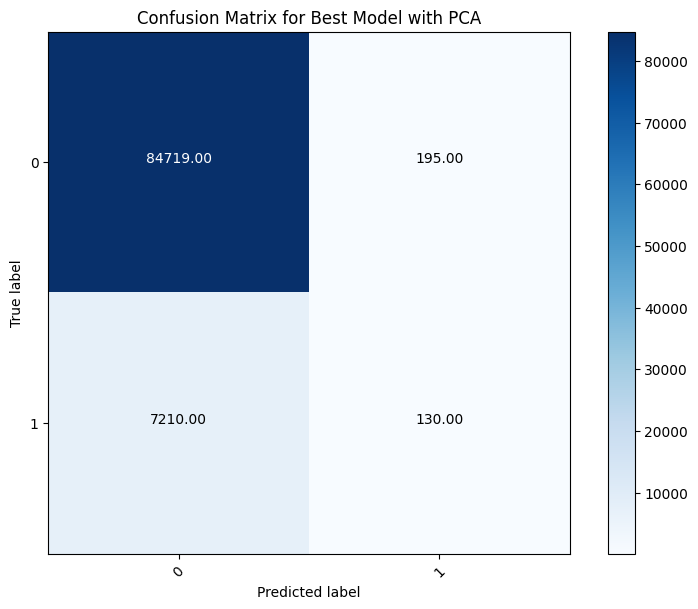

In [63]:
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Example usage
# Assuming you have the true labels (Y_test_PCA) and predicted labels (best_y_pred)
# from the select_top_PCA_features function
# Compute the confusion matrix
cm = confusion_matrix(Y_test_PCA, y_pred)

# Get the unique class labels
classes = np.unique(Y_test_PCA)

# Plot the confusion matrix
plot_confusion_matrix(cm, classes, title='Confusion Matrix for Best Model with PCA')

# **Confision matrix**